# The Second Circle: Linear Classifiers, Part One 
## Binary Classification 

<br/>
Jiří Fejlek

2025-12-22
<br/>


## Table of Contents

- [Heart Disease Datasets (Cleveland, Hungary, Switzerland, and the VA Long Beach)](#heart)
- [Data Exploration](#exploration-heart)
- [Imputation and Design Matrix](#imputation-heart)
- [Linear Classifiers](#lin_class-heart)
    - [Logistic Regression](#logistic-heart)
    - [Linear Discriminant Analysis](#lda-heart)
    - [Support Vector Machines](#svm-heart)
        - [Linear SVM](#svm-lin-heart)
        - [Kernel Trick and Kernel SVM](#kernel-trick-heart)
- [Quadratic Discriminant Analysis](#qda-heart)
- [Naive Bayes](#nb-heart)
- [Validation](#valid)
- [References](#references)

In the Second Circle, we will explore the linear classification methods: logistic regression, linear discriminant analysis, and linear support vector machines. In addition, we will consider some popular nonlinear extensions of these methods, namely, kernel support vector machines and quadratic discriminant analysis. Lastly, we will also have a look at naive Bayes classifiers.

## Heart Disease Datasets (Cleveland, Hungary, Switzerland, and the VA Long Beach) <a class="anchor" id="heart"></a>

We will consider datasets obtained from https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data, based on https://archive.ics.uci.edu/dataset/45/heart+disease, which contain information about 920 patients in this project. The dataset is a combination of 4 studies (Cleveland Clinic in Cleveland, Ohio; Hungarian Institute of Cardiology in Budapest, Hungary; Veterans Administration Medical Center in
Long Beach, California; University Hospitals in Zurich and Basel, Switzerland) [[1](#1)]. The goal is to distinguish the patients with heart disease. The variables in the dataset are as follows.

* **age** 
* **sex** - age (at the time of examination)
* **dataset** - Cleveland, Hungary, Switzerland, and the VA Long Beach
* **cp** - chest pain type (typical angina, atypical angina, non-anginal, asymptomatic)
* **trestbps** - resting blood pressure in mm Hg 
* **chol** - serum cholesterol in mg/dl 
* **fbs** - fasting blood sugar > 120 mg/dl (True/False)
* **restecg** - resting electrocardiographic results (normal, ST-T abnormality, LV hypertrophy)
* **thalach** - maximum heart rate achieved
* **exang** -  exercise-induced angina (True/ False)
* **oldpeak** - ST depression induced by exercise relative to rest
* **slope** -  the slope of the peak exercise ST segment (flat, downsloping, upsloping)
* **ca** - number of major vessels (0-3) colored by fluoroscopy
* **thal** - thallium heart scan defect (normal, fixed defect, reversible defect)
* **num** -  diagnosis of heart disease (0 = no heart disease; 1,2,3,4 = stages of heart disease)

### Data Exploration <a class="anchor" id="exploration-heart"></a>

Let us start with loading the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.set_printoptions(legacy='1.25')

In [2]:
heart = pd.read_csv('C:/Users/elini/Desktop/nine circles 2/heart_disease_uci.csv')
heart

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
heart.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

We can notice that some values of **trestbps**/**cholesterol** values are zero (e.g., cholesterol levels are all 0  in the dataset from Hungary), which is clearly a coding for missing values.

In [4]:
heart.loc[heart['chol'] == 0,'chol'] = np.nan
heart.loc[heart['trestbps'] == 0,'trestbps'] = np.nan

Next, we will check for duplicated records.

In [5]:
heart.iloc[:,range(1,16)].duplicated(keep = False).any(axis = None)

True

Let us check which records are duplicated.

In [6]:
 heart.loc[heart.iloc[:,range(1,16)].duplicated(keep = False) == True]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
404,405,49,Female,Hungary,atypical angina,110.0,NaN,False,normal,160.0,False,0.0,NaN,NaN,NaN,0
405,406,49,Female,Hungary,atypical angina,110.0,NaN,False,normal,160.0,False,0.0,NaN,NaN,NaN,0
859,860,58,Male,VA Long Beach,non-anginal,150.0,219.0,False,st-t abnormality,118.0,True,0.0,NaN,NaN,NaN,2
907,908,58,Male,VA Long Beach,non-anginal,150.0,219.0,False,st-t abnormality,118.0,True,0.0,NaN,NaN,NaN,2


We will assume these records are duplicates and remove them from the dataset.

In [7]:
heart_red = heart.drop(axis = 0, index = [405,907]).reset_index()

As we have noticed, some records are missing in the dataset.

In [8]:
heart_red.isna().sum(axis = 0)

index         0
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     60
chol        201
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       307
ca          609
thal        484
num           0
dtype: int64

Let us also check the values of numerical variables.

In [9]:
numeric_variables_heart = ['age','trestbps','chol','thalch','oldpeak']
categorical_variables_heart = ['sex','dataset','cp','fbs','restecg','exang','slope','thal']

numeric_basic_stats = np.zeros([len(numeric_variables_heart),6])

for i in range(len(numeric_variables_heart)):
    numeric_basic_stats[i,0] = np.mean(heart_red[numeric_variables_heart[i]])
    numeric_basic_stats[i,1] = np.nanmedian(heart_red[numeric_variables_heart[i]])
    numeric_basic_stats[i,2] = np.nanmin(heart_red[numeric_variables_heart[i]])
    numeric_basic_stats[i,3] = np.nanquantile(heart_red[numeric_variables_heart[i]], 0.25)
    numeric_basic_stats[i,4] = np.nanquantile(heart_red[numeric_variables_heart[i]], 0.75)
    numeric_basic_stats[i,5] = np.nanmax(heart_red[numeric_variables_heart[i]])

      
pd.DataFrame(data=numeric_basic_stats, index=numeric_variables_heart, columns=['mean','median','min','1st qrt.','3rd qrt.','max'])

,mean,median,min,1st qrt.,3rd qrt.,max
age,53.510893,54.0,28.0,47.0,60.0,77.0
trestbps,132.291375,130.0,80.0,120.0,140.0,200.0
chol,246.871688,240.0,85.0,210.0,277.0,603.0
thalch,137.542294,140.0,60.0,120.0,157.0,202.0
oldpeak,0.880841,0.5,-2.6,0.0,1.5,6.2


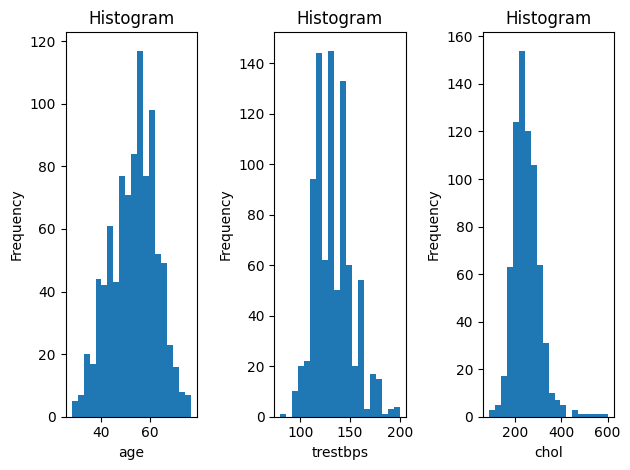

In [10]:
f,a = plt.subplots(1,3)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(heart_red[numeric_variables_heart[idx]], bins=20)
    ax.set_title('Histogram')
    ax.set_xlabel(numeric_variables_heart[idx])
    ax.set_ylabel('Frequency')
plt.tight_layout()

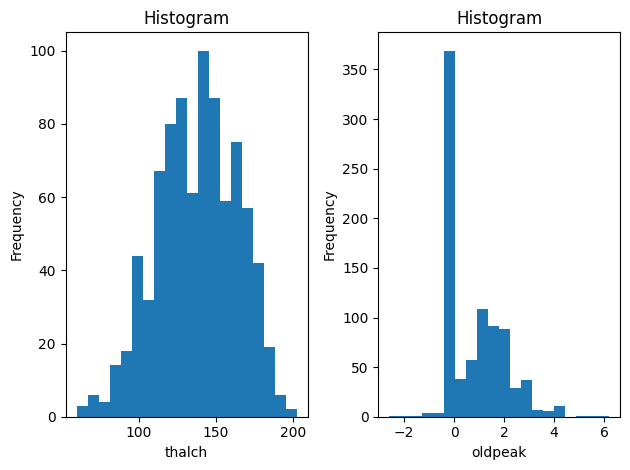

In [11]:
f,a = plt.subplots(1,2)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(heart_red[numeric_variables_heart[idx+3]], bins=20)
    ax.set_title('Histogram')
    ax.set_xlabel(numeric_variables_heart[idx+3])
    ax.set_ylabel('Frequency')
plt.tight_layout()


The categorical variables are as follows.

In [12]:
heart_red['sex'].value_counts()

sex
Male      725
Female    193
Name: count, dtype: int64

In [13]:
heart_red['dataset'].value_counts()

dataset
Cleveland        304
Hungary          292
VA Long Beach    199
Switzerland      123
Name: count, dtype: int64

In [14]:
heart_red['cp'].value_counts()

cp
asymptomatic       496
non-anginal        203
atypical angina    173
typical angina      46
Name: count, dtype: int64

In [15]:
heart_red['fbs'].value_counts()

fbs
False    690
True     138
Name: count, dtype: int64

In [16]:
heart_red['restecg'].value_counts()

restecg
normal              550
lv hypertrophy      188
st-t abnormality    178
Name: count, dtype: int64

In [17]:
heart_red['exang'].value_counts()

exang
False    527
True     336
Name: count, dtype: int64

In [18]:
heart_red['slope'].value_counts()

slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

In [19]:
heart_red['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

Apart from the missing records, we do not observe any obvious issues with the dataset.

### Imputation and Design Matrix <a class="anchor" id="imputation-heart"></a>

We will perform the imputation via *missForrest* to complete the records. To prepare the dataset, we need to label the categorical variables first.

In [20]:
heart_imp = heart_red[['age','sex','dataset','cp','trestbps','chol','fbs','restecg','thalch','exang','oldpeak','slope', 'thal']].copy()

heart_imp['sex'] = heart_imp['sex'].map({'Male': 1, 'Female': 0})
heart_imp['dataset'] = heart_imp['dataset'].map({'Cleveland': 0, 'Hungary': 1, 'Switzerland': 2, 'VA Long Beach': 3})
heart_imp['cp'] = heart_imp['cp'].map({'asymptomatic': 0, 'typical angina': 1, 'atypical angina': 2, 'non-anginal': 3})
heart_imp['fbs'] = heart_imp['fbs'].map({True: 1, False: 0})
heart_imp['restecg'] = heart_imp['restecg'].map({'normal': 0, 'lv hypertrophy': 1, 'st-t abnormality': 2})
heart_imp['exang'] = heart_imp['exang'].map({True: 1, False: 0})
heart_imp['slope'] = heart_imp['slope'].map({'flat': 0, 'downsloping': 1, 'upsloping': 2})
heart_imp['thal'] = heart_imp['thal'].map({'normal': 0, 'reversable defect': 1, 'fixed defect': 2})


We will ignore variables **ca** and **thal** in the imputation model, since both of these are missing over half of the values.

In [21]:
from missforest import MissForest

np.random.seed(123)

MissForest_imputation = MissForest(categorical=categorical_variables_heart)
MissForest_imputation._verbose = 0

MissForest_imputation.fit(x = heart_imp)
heart_imp_MissForest = heart_imp.copy()
heart_imp_MissForest =  MissForest_imputation.transform(x = heart_imp)

In [22]:
heart_imp_MissForest

,age,sex,dataset,cp,restecg,thalch,exang,trestbps,oldpeak,fbs,chol,slope,thal
0,63,1,0,1,1.0,150.000000,0.0,145.000000,2.300000,1.0,233.0,1.0,2.0
1,67,1,0,0,1.0,108.000000,1.0,160.000000,1.500000,0.0,286.0,0.0,0.0
2,67,1,0,0,1.0,129.000000,1.0,120.000000,2.600000,0.0,229.0,0.0,1.0
3,37,1,0,3,0.0,187.000000,0.0,130.000000,3.500000,0.0,250.0,1.0,0.0
4,41,0,0,2,1.0,172.000000,0.0,130.000000,1.400000,0.0,204.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,54,0,3,0,2.0,154.000000,0.0,127.000000,0.000000,1.0,333.0,0.0,0.0
914,62,1,3,1,2.0,147.018515,0.0,129.296277,0.325513,0.0,139.0,0.0,0.0
915,55,1,3,0,2.0,100.000000,0.0,122.000000,0.000000,1.0,223.0,0.0,2.0
916,58,1,3,0,1.0,136.597430,0.0,138.586581,0.200740,1.0,385.0,0.0,0.0


Let us create our final model matrix.

In [23]:
heart_final = heart_imp_MissForest.copy()
heart_final['heart_disease'] = (heart['num'] > 0).astype(int) 
heart_final['dataset'] = heart_final['dataset'].map({0: 'Clv', 1: 'Hun', 2: 'Swit', 3: 'VA'})
heart_final['cp'] = heart_final['cp'].map({0: 'asymp', 1: 'typ', 2: 'atyp', 3: 'nonang'})
heart_final['restecg'] = heart_final['restecg'].map({0: 'normal', 1: 'hypertrophy', 2: 'stt'})
heart_final['slope'] = heart_final['slope'].map({0: 'flat', 1: 'down', 2: 'up'})
heart_final['thal'] = heart_final['thal'].map({0: 'normal', 1: 'rev', 2: 'fixed'})

heart_final = pd.concat([heart_final,pd.get_dummies(heart_final[['cp','restecg','slope','thal']], dtype=int)], axis=1)
heart_final = heart_final[['age','sex','cp_typ','cp_atyp','cp_nonang','restecg_hypertrophy','restecg_stt',\
                           'thalch','exang','trestbps','oldpeak','fbs','chol','slope_down','slope_up','thal_rev','thal_fixed','heart_disease']]
heart_final

,age,sex,cp_typ,cp_atyp,cp_nonang,restecg_hypertrophy,restecg_stt,thalch,exang,trestbps,oldpeak,fbs,chol,slope_down,slope_up,thal_rev,thal_fixed,heart_disease
0,63,1,1,0,0,1,0,150.000000,0.0,145.000000,2.300000,1.0,233.0,1,0,0,1,0
1,67,1,0,0,0,1,0,108.000000,1.0,160.000000,1.500000,0.0,286.0,0,0,0,0,1
2,67,1,0,0,0,1,0,129.000000,1.0,120.000000,2.600000,0.0,229.0,0,0,1,0,1
3,37,1,0,0,1,0,0,187.000000,0.0,130.000000,3.500000,0.0,250.0,1,0,0,0,0
4,41,0,0,1,0,1,0,172.000000,0.0,130.000000,1.400000,0.0,204.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,54,0,0,0,0,0,1,154.000000,0.0,127.000000,0.000000,1.0,333.0,0,0,0,0,1
914,62,1,1,0,0,0,1,147.018515,0.0,129.296277,0.325513,0.0,139.0,0,0,0,0,1
915,55,1,0,0,0,0,1,100.000000,0.0,122.000000,0.000000,1.0,223.0,0,0,0,1,1
916,58,1,0,0,0,1,0,136.597430,0.0,138.586581,0.200740,1.0,385.0,0,0,0,0,0


## Linear Classifiers <a class="anchor" id="lin_class-heart"></a>

We will begin building a classifier for the dataset using the three most prominent linear classifiers: logistic regression, linear discriminant analysis, and support vector machines. These classifiers are termed as such because, in their basic form, the decision boundaries generated by these methods are linear (i.e., the classification is performed by separating the data points with a hyperplane).

### Logistic Regression <a class="anchor" id="logistic-heart"></a>

We already explored logistic regression in the previous circle. The logistic regression model assumes that  $\mathrm{log} \frac{p}{1-p} = X\beta$, where $p$ is the probability of the response being one and $X$ is the model matrix of our predictor variables (so-called *features*) and $\beta$ are the parameters. The parameters are obtain by maximizing conditional likelihood $L(Y|X) = \Pi_{y_k = 0} (1-p_k) \cdot \Pi_{y_k = 1} p_k $ which is equivalent to minimizing the log loss (aka logarithmic score aka log-likelihood) $-\frac{1}{n}\sum_i y_i \mathrm{log}p_i + (1-y_i)\mathrm{log}(1-p_i)$.

From a classification standpoint, logistic regression is indeed a linear classifier, i.e., it has a linear decision boundary; the feature space $\mathcal{X}$ is split into cases classified as zeros and ones by a hyperplane. This is because the log-odds  $\mathrm{log} \frac{p}{1-p} = X\beta$ is linear in $X$, and hence, the separating hyperplane for threshold equals 0.5 is $\{x \in \mathcal{X} | x^T\beta = 0 \}$ since $\mathrm{log} \frac{p}{1-p} = 0$ on the threshold. For other probability thresholds the hyperplane merely shifts to $\{x \in \mathcal{X} | x^T\beta = c \}$, where $\mathrm{log} \frac{p}{1-p} = c$ [[2](#2)]. However, this observation also implies that we can obtain a nonlinear classifier using logistic regression; we merely need to consider nonlinear terms of the features from $\mathcal{X}$ in the formula for log-odds, e.g., by including interactions or using smooths for continuous predictors. 

Let us fit a simple logistic model using our design matrix.

In [24]:
import statsmodels.formula.api as smf
log_reg_heart = smf.logit(formula='heart_disease ~ age + sex + cp_typ + cp_atyp + cp_nonang + restecg_hypertrophy + \
                          restecg_stt + thalch + exang + trestbps + oldpeak + fbs + chol + slope_down + slope_up + \
                          thal_rev + thal_fixed', data=heart_final)
log_reg_heart_fit = log_reg_heart.fit(disp=0)                              
print(log_reg_heart_fit.summary())

                           Logit Regression Results                           
Dep. Variable:          heart_disease   No. Observations:                  918
Model:                          Logit   Df Residuals:                      900
Method:                           MLE   Df Model:                           17
Date:                Tue, 13 Jan 2026   Pseudo R-squ.:                  0.3131
Time:                        01:56:09   Log-Likelihood:                -433.47
converged:                       True   LL-Null:                       -631.07
Covariance Type:            nonrobust   LLR p-value:                 1.866e-73
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0444      1.126     -0.039      0.969      -2.251       2.162
age                     0.0261      0.010      2.488      0.013       0.006       0.047
sex             

Let us explore the performance of our classifiers. 

In [25]:
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, roc_curve, roc_auc_score, log_loss, brier_score_loss, f1_score, matthews_corrcoef, cohen_kappa_score)
from sklearn.calibration import calibration_curve  

pred_prob_heart = log_reg_heart_fit.predict()
obs_heart = heart_final['heart_disease'].to_numpy()

# scores
accuracy_scores_lr = np.zeros(41)
balanced_accuracy_scores_lr = np.zeros(41)
f1_scores_lr = np.zeros(41)
f1_scores_neg_lr = np.zeros(41)
matthews_corrcoefs_lr = np.zeros(41)
cohen_kappa_scores_lr = np.zeros(41)
accuracy_thresholds = np.zeros(41)


for k in range(41):
    accuracy_thresholds[k] = k/40
    accuracy_scores_lr[k] = accuracy_score(obs_heart,(pred_prob_heart > accuracy_thresholds[k]).astype(int))
    balanced_accuracy_scores_lr[k] = balanced_accuracy_score(obs_heart,(pred_prob_heart > accuracy_thresholds[k]).astype(int))
    f1_scores_lr[k] = f1_score(obs_heart,(pred_prob_heart > accuracy_thresholds[k]).astype(int))
    f1_scores_neg_lr[k] = f1_score(obs_heart,(pred_prob_heart > accuracy_thresholds[k]).astype(int),pos_label=0)
    matthews_corrcoefs_lr[k] = matthews_corrcoef(obs_heart,(pred_prob_heart > accuracy_thresholds[k]).astype(int))
    cohen_kappa_scores_lr[k] = cohen_kappa_score(obs_heart,(pred_prob_heart > accuracy_thresholds[k]).astype(int))
 

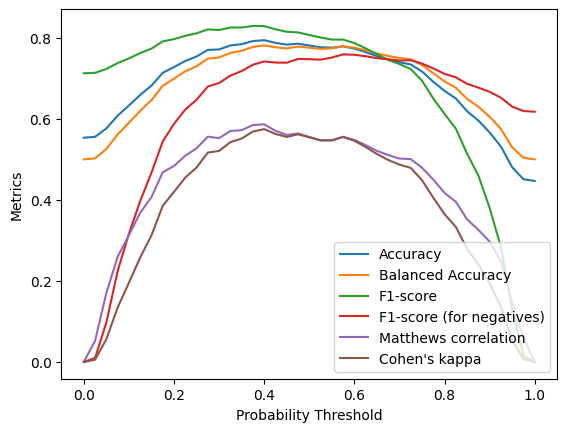

In [26]:
plt.plot(accuracy_thresholds,accuracy_scores_lr)
plt.plot(accuracy_thresholds,balanced_accuracy_scores_lr)
plt.plot(accuracy_thresholds,f1_scores_lr)
plt.plot(accuracy_thresholds,f1_scores_neg_lr)
plt.plot(accuracy_thresholds,matthews_corrcoefs_lr)
plt.plot(accuracy_thresholds,cohen_kappa_scores_lr)

plt.legend(['Accuracy','Balanced Accuracy','F1-score','F1-score (for negatives)','Matthews correlation',"Cohen's kappa"], loc="lower right")
plt.xlabel('Probability Threshold')
plt.ylabel('Metrics');

Accuracy is simply the percentage of correctly classified cases. The balanced accuracy is the arithmetic mean of sensitivity (also known as recall) $\frac{\text{true positives}}{\text{true positives + false positives}}$ and specificity $\frac{\text{true negatives}}{\text{true negatives + false negatives}}$. Balanced accuracy is used to alleviate the misleading nature of overall accuracy for imbalanced datasets.

The F1-score is the harmonic mean of the sensitivity and precision $\frac{\text{true positives}}{\text{true positives  + false negatives}}$ (i.e., what percentage of positives are detected; also known as positive predictive value). Notably, the F1-score focuses on the classifier's performance at detecting the positive class. To demonstrate the asymmetry of the F1-score, we also computed the F1-score for "switched" labels, i.e., the harmonic between specificity and negative predictive value.

The Matthews correlation coefficient is the Pearson correlation between predicted and observed classes. Its advantage over other scores, such as the balanced accuracy and the F1-score, is the fact that to obtain high values of the Matthews correlation coefficient close to one, all key metrics, specificity, sensitivity, and positive and negative predictive values must be high [[3](#3)]. 

Cohen's kappa coefficient measures the agreement between the predicted and observed classes by comparing the observed proportion of correctly classified data points with the expected proportion under random chance. The value of Cohen's kappa always lies between zero and the value of the Matthews correlation coefficient. Their values are always pretty close when both of them are positive (they can disagree for negative values: a classifier with a Matthews correlation coefficient of -1 can have an arbitrary value of Cohen's kappa from $[-1, 0]$) [[4](#4)].  

We observe that our predictions fairly agree with the observations. Let us check the concordance index (aka the area under the ROC curve) next.

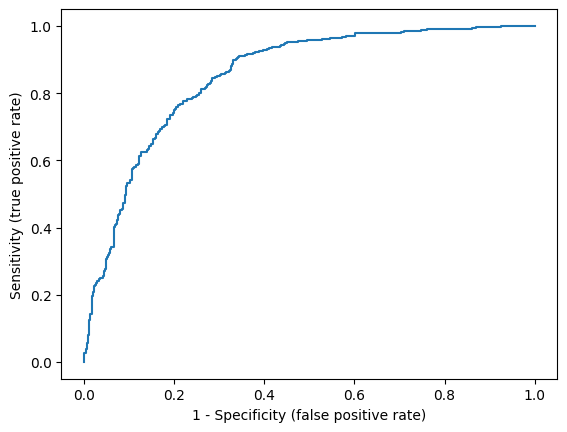

In [27]:
fpr, tpr, thresholds = roc_curve(obs_heart,pred_prob_heart)
plt.plot(fpr,tpr)
plt.xlabel('1 - Specificity (false positive rate)')
plt.ylabel('Sensitivity (true positive rate)');

In [28]:
roc_auc_score(obs_heart,pred_prob_heart)

0.8517476473977339

Again, we observe that our predictions are fairly concordant with the observations. 

In [29]:
log_loss(obs_heart, pred_prob_heart)

0.47218627330677126

In [30]:
brier_score_loss(obs_heart,pred_prob_heart)

0.1518730142029965

The Brier score is significantly lower than 0.25 (corresponding to random predictions of 0.5) and predictions based on prevalence.

In [31]:
brier_score_loss(obs_heart,(heart_final['heart_disease'].sum()/len(heart_final)).repeat(len(heart_final))) # Brier score for predictions based on prevalence

0.2471509058719106

Lastly, we can check the calibration.

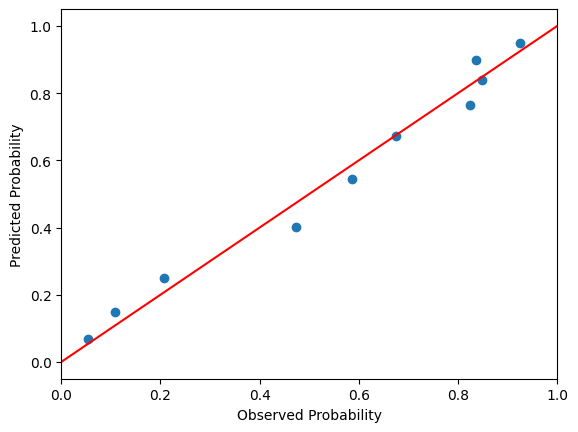

In [32]:
prob_true, prob_pred = calibration_curve(obs_heart,pred_prob_heart, n_bins=10, strategy = 'quantile')
sm.graphics.abline_plot(intercept = 0,slope = 1,color = 'red')
plt.scatter(prob_true,prob_pred)
plt.xlabel('Observed Probability')
plt.ylabel('Predicted Probability');

Overall, the logistic regression model seems to perform quite well. Of course, we need to cross-validate our results to estimate performance on new data. We will return to the cross-validation once we introduce other classifiers.

### Linear Discriminant Analysis <a class="anchor" id="lda-heart"></a>

Linear discriminant analysis (LDA) assumes a multivariate normal distribution of predictors $X$ for the responses $Y$, i.e.,  $P(X = x|Y = k) = (2\pi)^{-p/2}|\Sigma|^{-1/2} \mathrm{exp} (-\frac{1}{2}(x-\mu_k)^T\Sigma(x-\mu_k))$ (parameters $\mu_k$ and $\Sigma$ are estimated from the data using the respective sample means and sample covariance). The probability of $k$th class $p_k$ can be subsequently computed using the Bayes rule $P(Y=k|X = x) = \frac{f_k(x)\pi_k}{\sum_j f_j(x)\pi_j}$, where $\pi_j$ are prior probabilities for $j$th class (usually estimated using the observed prevalence $\hat\pi_j = N_j/N$) [[2](#2),[5](#5)].

In our case, we assume a binary classification problem, i.e, $Y = 0, 1$. Let us denote $p = P(Y = 1|X = x)$. We can derive that $$\mathrm{logit}(p) =  \frac{p}{1-p} = \mathrm{log}\frac{\pi_1}{\pi_0} - \frac{1}{2}(\mu_1 +\mu_0)^T\Sigma^{-1} (\mu_1 -\mu_0) +  x^T\Sigma^{-1} (\mu_1 -\mu_0),$$ which is a linear function in $x$ as was also the case for the logistic regression. This implies that LDA also has a linear decision boundary for a given probability threshold. However, the coefficients in logistic regression are computed as argument maxima of the *conditional* likelihood $L(Y \mid X)$ (logistic regression is a so-called *discriminative* model). In contrast, LDA is based on the assumption of Gaussian distributions $P(X = x|Y=k)$ and maximizes the full joint likelihood $L(X, Y)$  (LDA is a so-called *generative* model) [[2](#2)].

Due to the normality assumption for $X$ (which is often clearly violated, e.g., for categorical predictors), LDA would seem to be significantly more restrictive in its use than logistic regression (logistic regression makes no distributional assumption on $X$). However, LDA and logistic regression are often quite close in predictive performance in practice, although logistic regression is considered more robust in general [[2](#2)].  This is because outliers can heavily influence the computation of class means, thereby shifting the centers of Gaussian distributions. This is even a problem in the case of *concordant* outliers (outliers with extreme values of $X$, but in the "correct" class). Logistic regression is robust to *concordant* outliers, since the sigmoid link "squishes" the effect of large values of predictors. 

Let us perform LDA and compare the results with those of the logistic model. 

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_heart = LinearDiscriminantAnalysis(store_covariance=True)
lda_heart = lda_heart.fit(X = heart_final.iloc[:,range(0,17)], y = heart_final['heart_disease']) 
pred_prob_heart_lda = lda_heart.predict_proba(heart_final.iloc[:,range(0,17)]) # predict probabilities

The class predictions using *predict* are based on 0.5 threshold.

In [34]:
pred_class_heart_lda_class = lda_heart.predict(heart_final.iloc[:,range(0,17)])
((pred_prob_heart_lda[:,1] > 0.5).astype(int) - pred_class_heart_lda_class)[range(20)]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

The estimated parameters can be obtained as follows.

In [35]:
lda_heart.priors_ # class priors

array([0.44662309, 0.55337691])

In [36]:
lda_heart.means_ # class means for predictors 

array([[5.07804878e+01, 6.56097561e-01, 5.85365854e-02, 3.39024390e-01,
        3.17073171e-01, 1.90243902e-01, 1.53658537e-01, 1.47859343e+02,
        1.73170732e-01, 1.30644130e+02, 4.71021870e-01, 1.14634146e-01,
        2.40851266e+02, 4.63414634e-02, 3.02439024e-01, 1.04878049e-01,
        3.41463415e-02],
       [5.57145669e+01, 8.97637795e-01, 4.33070866e-02, 6.69291339e-02,
        1.43700787e-01, 2.16535433e-01, 2.26377953e-01, 1.29450732e+02,
        5.21653543e-01, 1.33427158e+02, 1.17211142e+00, 1.79133858e-01,
        2.49192266e+02, 8.66141732e-02, 1.55511811e-01, 2.93307087e-01,
        6.29921260e-02]])

In [37]:
np.matrix(lda_heart.covariance_).round(3)[range(2),:]  # covariance matrix for predictors

array([[ 8.2860e+01, -8.0000e-02,  8.4000e-02, -4.7300e-01,  1.6700e-01,
         5.2200e-01,  4.2100e-01, -6.1179e+01,  3.0200e-01,  3.7066e+01,
         1.5020e+00,  6.6300e-01,  2.1345e+01,  2.8100e-01,  1.3400e-01,
         2.7300e-01,  7.0000e-03],
       [-8.0000e-02,  1.5200e-01,  1.0000e-03, -9.0000e-03, -1.0000e-03,
        -1.0000e-02,  6.0000e-03, -6.6500e-01,  9.0000e-03, -1.7200e-01,
        -2.0000e-03,  7.0000e-03, -2.2880e+00,  4.0000e-03, -7.0000e-03,
         1.0000e-02,  4.0000e-03]])

Let us evaluate the prediction metrics.

In [38]:
accuracy_scores_lda = np.zeros(41)
balanced_accuracy_scores_lda = np.zeros(41)
f1_scores_lda = np.zeros(41)
f1_scores_neg_lda = np.zeros(41)
matthews_corrcoefs_lda = np.zeros(41)
cohen_kappa_scores_lda = np.zeros(41)

for k in range(41):
    accuracy_thresholds[k] = k/40
    accuracy_scores_lda[k] = accuracy_score(obs_heart,(pred_prob_heart_lda[:,1] > accuracy_thresholds[k]).astype(int))
    balanced_accuracy_scores_lda[k] = balanced_accuracy_score(obs_heart,(pred_prob_heart_lda[:,1] > accuracy_thresholds[k]).astype(int))
    f1_scores_lda[k] = f1_score(obs_heart,(pred_prob_heart_lda[:,1] > accuracy_thresholds[k]).astype(int))
    f1_scores_neg_lda[k] = f1_score(obs_heart,(pred_prob_heart_lda[:,1] > accuracy_thresholds[k]).astype(int),pos_label=0)
    matthews_corrcoefs_lda[k] = matthews_corrcoef(obs_heart,(pred_prob_heart_lda[:,1] > accuracy_thresholds[k]).astype(int))
    cohen_kappa_scores_lda[k] = cohen_kappa_score(obs_heart,(pred_prob_heart_lda[:,1] > accuracy_thresholds[k]).astype(int))

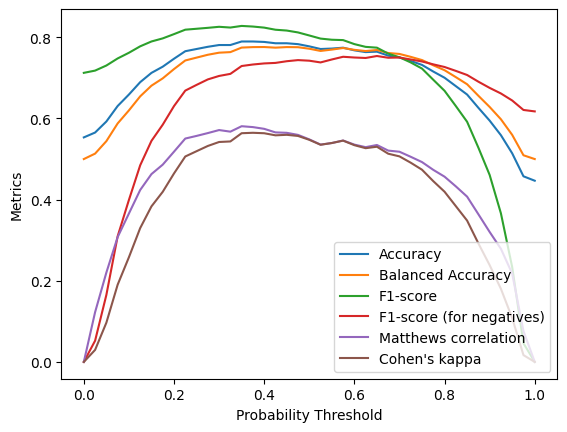

In [39]:
plt.plot(accuracy_thresholds,accuracy_scores_lda)
plt.plot(accuracy_thresholds,balanced_accuracy_scores_lda)
plt.plot(accuracy_thresholds,f1_scores_lda)
plt.plot(accuracy_thresholds,f1_scores_neg_lda)
plt.plot(accuracy_thresholds,matthews_corrcoefs_lda)
plt.plot(accuracy_thresholds,cohen_kappa_scores_lda)

plt.legend(['Accuracy','Balanced Accuracy','F1-score','F1-score (for negatives)','Matthews correlation',"Cohen's kappa"], loc="lower right")
plt.xlabel('Probability Threshold')
plt.ylabel('Metrics');

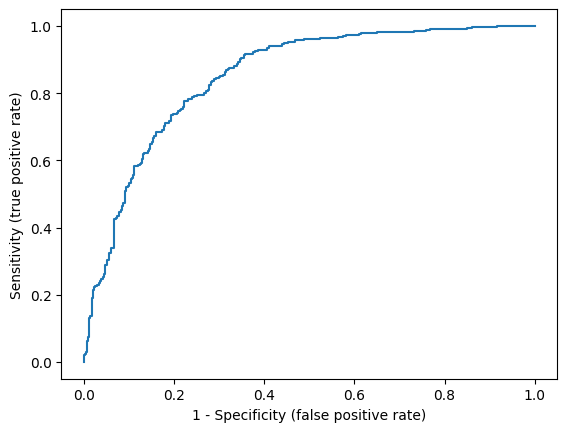

In [40]:
fpr, tpr, thresholds = roc_curve(obs_heart,pred_prob_heart_lda[:,1])
plt.plot(fpr,tpr)
plt.xlabel('1 - Specificity (false positive rate)')
plt.ylabel('Sensitivity (true positive rate)');

In [41]:
roc_auc_score(obs_heart,pred_prob_heart_lda[:,1])

0.8504417130785481

In [42]:
log_loss(obs_heart, pred_prob_heart_lda[:,1])

0.4753977069238272

In [43]:
brier_score_loss(obs_heart,pred_prob_heart_lda[:,1])

0.15254711301673954

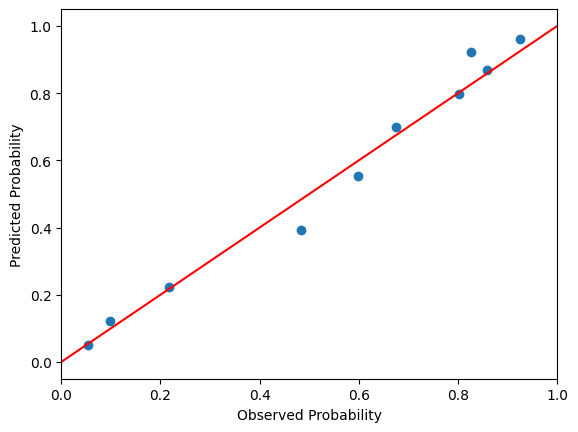

In [44]:
prob_true_lda, prob_pred_lda = calibration_curve(obs_heart,pred_prob_heart_lda[:,1], n_bins=10, strategy = 'quantile')
sm.graphics.abline_plot(intercept = 0,slope = 1,color = 'red')
plt.scatter(prob_true_lda,prob_pred_lda)
plt.xlabel('Observed Probability')
plt.ylabel('Predicted Probability');

We observe that the metrics are pretty similar to the logistic regression.

### Support Vector Machines <a class="anchor" id="svm-heart"></a>

Support vector machines are a family of classifier methods based on hyperplane separation via maximization of *margin*. We will first explore the classical linear SMV. Then, we will also discuss the kernel trick and kernel SVMs.  

#### Linear SVM <a class="anchor" id="svm-lin-heart"></a> 
A linear SVM is a linear classifier that selects the separating hyperplane as a solution of the optimization problem  $\text{maximize } M$  subject to $\Vert \beta \Vert = 1$, $\xi_i \geq 0$, $y_i(x_i^T\beta + \beta_0 )\geq M(1-\xi_i)$, and $\sum_i \xi_i \leq C$, where $C>0$ is some constant. Here, we assume that the classes are denoted as $-1$ and $1$ [[2](#2), [5](#5)].  

The set $\{x \mid x^T\beta + \beta_0\}$ is the separating hyperplane for the SVM classifier. Provided that the data are perfectly linearly separable, we can find values of $\beta$ and $\beta_0$ such that  $(x^T\beta + \beta_0 ) > 0$ for all data points in class $y = 1$ and $y(x^T\beta + \beta_0 ) < 0$ for all data points in class $y = -1$. Since there are infinitely many such separating hyperplanes, the optimizer chooses that one that maximizes the *margin* $M$, the distance between the separating hyperplane and the data points from both classes.

Provided that the data are not linearly separable, some data points must be misclassified when a linear classifier is used. Consequently, a *soft margin*  $M(1-\xi_i)$ is introduced for each observation in the optimization of the margin. The missclassification error $\sum_i \xi_i$ is controlled in the optimization by a tuning hyperparameter $C$. 

Let us fit an SVM  for $C = 1$. Since the solution depends on distances in the feature space, we need to standardize the data first. We do this by implementing a simple *pipeline*.

In [45]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svm_pipeline_heart1 = make_pipeline(StandardScaler(),  svm.SVC(C=1.0, kernel = 'linear'))
svm_pipeline_heart1.fit(X = heart_final.iloc[:,range(0,17)], y = heart_final['heart_disease'])
svm_predict_heart1 = svm_pipeline_heart1.predict(heart_final.iloc[:,range(0,17)])

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(obs_heart,svm_predict_heart1) 

array([[286, 124],
       [ 73, 435]])

The solution for $C = 10$ is as follows.

In [47]:
svm_pipeline_heart2 = make_pipeline(StandardScaler(),  svm.SVC(C=100.0, kernel = 'linear'))
svm_pipeline_heart2.fit(X = heart_final.iloc[:,range(0,17)], y = heart_final['heart_disease'])
svm_predict_heart2 = svm_pipeline_heart2.predict(heart_final.iloc[:,range(0,17)])

In [48]:
confusion_matrix(obs_heart,svm_predict_heart2) 

array([[287, 123],
       [ 74, 434]])

We observe that the solution differs slightly. To estimate the optimal value of $C$, we can use cross-validation using *GridSearchCV* (we will use the default single 5-fold cross-validation). We will use the balanced accuracy as our criterion for choosing the best model.

In [49]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':['linear'], 'C':[0.001, 0.01, 0.1, 1, 10, 100]} # hyperparameter grid

svm_pipeline_heart3 = make_pipeline(StandardScaler(),  GridSearchCV(estimator = svm.SVC(),param_grid = parameters, scoring = 'balanced_accuracy'))
svm_pipeline_heart3.fit(X = heart_final.iloc[:,range(0,17)], y = heart_final['heart_disease'])
svm_predict_heart3 = svm_pipeline_heart3.predict(heart_final.iloc[:,range(0,17)])

The chosen model can be obtained as follows.

In [50]:
svm_pipeline_heart3._final_estimator.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [51]:
svm_pipeline_heart3._final_estimator.cv_results_

{'mean_fit_time': array([0.00747643, 0.00525298, 0.00660157, 0.01365256, 0.06527877,
        0.62784281]),
 'std_fit_time': array([1.31484511e-03, 9.07530981e-05, 7.83057576e-04, 2.27396899e-03,
        9.32732055e-03, 1.88342632e-01]),
 'mean_score_time': array([0.00232959, 0.0018435 , 0.00177422, 0.00150838, 0.00177584,
        0.0019002 ]),
 'std_score_time': array([0.00039769, 0.00042704, 0.00043474, 0.00054248, 0.00046458,
        0.00077487]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
              mask=[False, False, False, False, False, False],
        fill_value=1e+20),
 'param_kernel': masked_array(data=['linear', 'linear', 'linear', 'linear', 'linear',
                    'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001, 'kernel': 'linear'},
  {'C': 0.01, 'kernel': 'linear'},
  {'C': 0.1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 1

We observe that the best results were obtained for $C = 0.01$.

The SVM classifier seems quite different from the remaining models we used up to this point. The model was described as essentially a solution to a geometric problem, without any underlying probability model. However, it turns out that linear SVMs are not that different from other regression approaches, such as logistic regression. It can be shown that the optimization problem used for determining the separating hyperplane is equivalent to the following problem. $$ \text{minimize}_{\beta,\beta_0} \sum_i \max[0,1-y_i(x_i^T\beta + \beta_0)] + \lambda \Vert\beta \Vert^2$$ for some appropriate value of $\lambda$ (corresponding to our choice of $C$). We see that the solution to the linear SVM can be described as a minimizer of the so-called *hinge loss* (which actually has a shape quite similar to the log loss used in logistic regression) with a *ridge* penalty, i.e., the optimized term has a very familiar form $L(X,Y;\beta) + \lambda \Vert\beta \Vert^2$. We also observe that the hyperparameter $C$ is tied to the regularization of the fit [[5](#5)].

One key difference between SVMs and classifiers we considered so far is that SVMs do not provide estimated class probabilities. To obtain these, we can use *Platt scaling*, which fits the scores obtained from SVM by logistic regression.

In [52]:
svm_pipeline_heart_best = make_pipeline(StandardScaler(),  svm.SVC(C=0.01, kernel = 'linear', probability = True))
svm_pipeline_heart_best.fit(X = heart_final.iloc[:,range(0,17)], y = heart_final['heart_disease'])
pred_prob_heart_svm = svm_pipeline_heart_best.predict_proba(heart_final.iloc[:,range(0,17)])
pred_prob_heart_svm

array([[0.25205444, 0.74794556],
       [0.08684826, 0.91315174],
       [0.04114867, 0.95885133],
       ...,
       [0.13664306, 0.86335694],
       [0.22071873, 0.77928127],
       [0.39215306, 0.60784694]])

Let us check the performance metrics.

In [53]:
accuracy_scores_svm = np.zeros(41)
balanced_accuracy_scores_svm = np.zeros(41)
f1_scores_svm = np.zeros(41)
f1_scores_neg_svm = np.zeros(41)
matthews_corrcoefs_svm = np.zeros(41)
cohen_kappa_scores_svm = np.zeros(41)

for k in range(41):
    accuracy_thresholds[k] = k/40
    accuracy_scores_svm[k] = accuracy_score(obs_heart,(pred_prob_heart_svm[:,1] > accuracy_thresholds[k]).astype(int))
    balanced_accuracy_scores_svm[k] = balanced_accuracy_score(obs_heart,(pred_prob_heart_svm[:,1] > accuracy_thresholds[k]).astype(int))
    f1_scores_svm[k] = f1_score(obs_heart,(pred_prob_heart_svm[:,1] > accuracy_thresholds[k]).astype(int))
    f1_scores_neg_svm[k] = f1_score(obs_heart,(pred_prob_heart_svm[:,1] > accuracy_thresholds[k]).astype(int),pos_label=0)
    matthews_corrcoefs_svm[k] = matthews_corrcoef(obs_heart,(pred_prob_heart_svm[:,1] > accuracy_thresholds[k]).astype(int))
    cohen_kappa_scores_svm[k] = cohen_kappa_score(obs_heart,(pred_prob_heart_svm[:,1] > accuracy_thresholds[k]).astype(int))

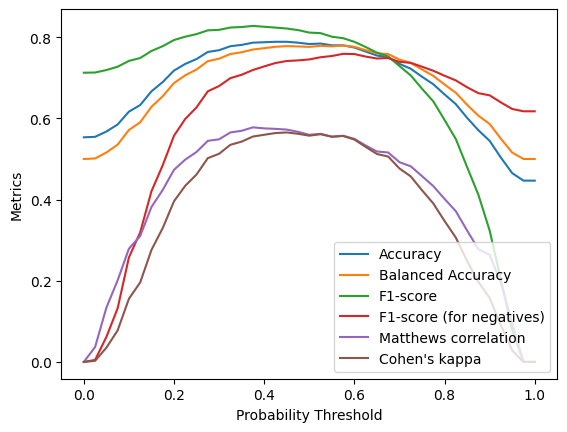

In [54]:
plt.plot(accuracy_thresholds,accuracy_scores_svm)
plt.plot(accuracy_thresholds,balanced_accuracy_scores_svm)
plt.plot(accuracy_thresholds,f1_scores_svm)
plt.plot(accuracy_thresholds,f1_scores_neg_svm)
plt.plot(accuracy_thresholds,matthews_corrcoefs_svm)
plt.plot(accuracy_thresholds,cohen_kappa_scores_svm)

plt.legend(['Accuracy','Balanced Accuracy','F1-score','F1-score (for negatives)','Matthews correlation',"Cohen's kappa"], loc="lower right")
plt.xlabel('Probability Threshold')
plt.ylabel('Metrics');

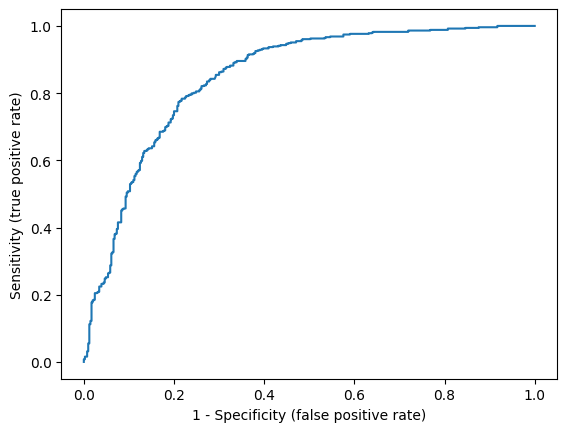

In [55]:
fpr, tpr, thresholds = roc_curve(obs_heart,pred_prob_heart_svm[:,1])
plt.plot(fpr,tpr)
plt.xlabel('1 - Specificity (false positive rate)')
plt.ylabel('Sensitivity (true positive rate)');

In [56]:
roc_auc_score(obs_heart,pred_prob_heart_svm[:,1])

0.8486556558478969

In [57]:
log_loss(obs_heart, pred_prob_heart_svm[:,1])

0.47570242930307405

In [58]:
brier_score_loss(obs_heart,pred_prob_heart_svm[:,1])

0.15243364832300718

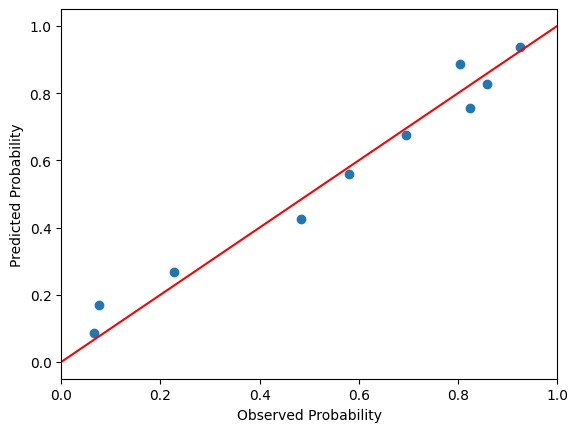

In [59]:
prob_true_svm, prob_pred_svm = calibration_curve(obs_heart,pred_prob_heart_svm[:,1], n_bins=10, strategy = 'quantile')
sm.graphics.abline_plot(intercept = 0,slope = 1,color = 'red')
plt.scatter(prob_true_svm,prob_pred_svm)
plt.xlabel('Observed Probability')
plt.ylabel('Predicted Probability');

As expected, the metrics are again quite similar to logistic regression and LDA.

#### Kernel Trick and Kernel SVM <a class="anchor" id="kernel-trick-heart"></a>

One important property of SVMs is the fact that the solution depends on features $X$ merely via the inner products $\langle x_i,x_j \rangle = x_i^Tx_j$. This can be seen by deriving the dual optimization problem for the SVM [[2](#2),[5](#5)] $$\text{max } \sum_i\alpha_i - \frac{1}{2} \sum_i \sum_j \alpha_i \alpha_j y_i y_j \langle x_i,x_j \rangle$$ subject to $\sum_i \alpha_i y_i = 0$ and $0 \leq \alpha_i \leq C$. We would also get from the KKT conditions used to derive the dual problem that $\beta = \sum_i \alpha_i y_i x_i$.  Consequently, the classification hyperplane  meets $f(x)  = \beta_0 + x^T \beta = \beta_0 + \sum_i \alpha_i y_i \langle x,x_i \rangle = \beta_0 + \sum_i \tilde{\alpha_i} \langle x,x_i \rangle$ [[2](#2),[5](#5)]. In addition, since $\alpha_i$ are Lagrange multipliers that are non-zero only for active constraints (in our case,  $y_i(x_i^T\beta + \beta_0 ) =  M(1-\xi_i)$), we conclude that the SVM classifier depends merely on several so-called *support vectors* (hence, the name of the method). Intuitively, this makes sense; the data points that lie deep in the "correct" half-space do not influence the coefficients of the optimal separating hyperplane. This also means that the SVM is robust to concordant outliers. 

These derivations imply that to obtain a nonlinear classifier on $X$, we do not need to specify an appropriate transformation of the feature space to get a new feature space $\phi(X)$, where the data would be well separated. Instead, we can employ the *kernel trick*: we pick an inner product using a *kernel* $\langle \phi(x_i),\phi(x_j) \rangle = K(x_i,x_j)$ without explicitly stating the transformation $\phi$. Naturally, not all functions $K(x_i,x_j)$ define a proper inner product. The two most popular so-called *positive-definite kernel* functions that do are [[5](#5)]  
- polynomial kernel $K(x_i,x_j) = (\gamma \langle x_i,x_j \rangle + r)^d$, where $\gamma >0$, $d \geq 1$, $r\geq 0$
- radial kernel $K(x_i,x_j) = \mathrm{exp}(-\gamma \Vert x_i-x_j \Vert^2)$, where $\gamma >0$

Another popular kernel function is the sigmoid kernel $\mathrm{tanh}(\gamma \langle x_i,x_j \rangle + r)$. However, this kernel is not always positive-definite (depending on parameter values), and thus a sigmoid kernel might not define an inner product (see Mercer's theorem, e.g., [[6](#6)]). From a computational standpoint, this means that the underlying optimization problem is no longer guaranteed to be convex (the optimal objective value might even be $-\infty$) [[7](#7)].

We should note here that this "kernelization" is not something *unique* to SVM. On the contrary, kernel SVM is just a special case of the application of the *representer theorem* [[8](#8)]. It can be shownn that  that any minimizer function $\phi^*$ from a so-called *reproducing kernel Hilbert space* of functions $\mathcal{H}_K$ given by a positive-definite kernel $K$ (from Moore–Aronszajn theorem kernel $K$ defines $\mathcal{H}_K$) $$\phi^*= \text{argmin}_{\phi \in \mathcal{H}_K} E(y_1,x_1,\phi(x_1), \ldots, y_n,x_n,\phi(x_n) + g(\Vert \phi \Vert)_{\mathcal{H}_K},$$ where $E$ is an error function and $g$ is an increasing non-negative function,  can be expressed as $\phi^* (x) = \sum_i \alpha_i^* K(x,x_i)$ for some real $\alpha^*_i$. Thus, for example, if we want to "kernelize" ridge regression (we will assume centered responses, i.e., no intercept in the model)
$$\text{minimize}_{\beta} \frac{1}{n} \sum_i (y_i - x_i^T\beta)^2 + \lambda\Vert \beta \Vert^2,$$ we restate the problem as $$\text{minimize}_{\phi \in \mathcal{H}_K} \frac{1}{n} \sum_i (y_i - \phi(x_i))^2 + \lambda\Vert \phi \Vert_{\mathcal{H}_K}^2$$ and the solution from the representer theorem is $\phi^* (x) = \sum_i \alpha_i^*, K(x,x_i)$. In fact,  $\alpha^*  = (G+\lambda I)^{-1}y$ and $G_{i,j} = \langle x_i,x_j \rangle$ is the Gram matrix of $K$, which can be derived by substituting back in the solution from the representer theorem and solving the optimization [[6](#6)].

Similarly, kernel SVM can be understood as an application of the representer theorem on the hinge loss (although we saw that it can also be derived just from the dual problem). Looking at the representer theorem, we also got an alternative interpretation of the kernel trick. By choosing a kernel, we picked a transformation of the feature space that is optimal (in the space induced by the kernel) with respect to our cost. 

Returning to SVMs, let us fit an SVM based on a radial kernel. We need to optimize for two parameters: $C$ and $\gamma$.

In [60]:
parameters_rbf = {'kernel':['rbf'], 'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
svm_pipeline_heart_rbf = make_pipeline(StandardScaler(),  GridSearchCV(estimator = svm.SVC(probability = True), param_grid = parameters_rbf, scoring = 'balanced_accuracy'))
svm_pipeline_heart_rbf.fit(X = heart_final.iloc[:,range(0,17)], y = heart_final['heart_disease'])
svm_pipeline_heart_rbf._final_estimator.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

It seems we have found the best-performing classifier overall. However, we must keep in mind that this model is much more flexible than the linear classifiers we considered thus far. Thus, there is a notable risk that the apparent performance will not generalize as well to the new data.

In [61]:
pred_prob_heart_svm_rbf = svm_pipeline_heart_rbf.predict_proba(heart_final.iloc[:,range(0,17)])

accuracy_scores_svm_rbf = np.zeros(41)
balanced_accuracy_scores_svm_rbf = np.zeros(41)
f1_scores_svm_rbf = np.zeros(41)
f1_scores_neg_svm_rbf = np.zeros(41)
matthews_corrcoefs_svm_rbf = np.zeros(41)
cohen_kappa_scores_svm_rbf = np.zeros(41)

for k in range(41):
    accuracy_thresholds[k] = k/40
    accuracy_scores_svm_rbf[k] = accuracy_score(obs_heart,(pred_prob_heart_svm_rbf[:,1] > accuracy_thresholds[k]).astype(int))
    balanced_accuracy_scores_svm_rbf[k] = balanced_accuracy_score(obs_heart,(pred_prob_heart_svm_rbf[:,1] > accuracy_thresholds[k]).astype(int))
    f1_scores_svm_rbf[k] = f1_score(obs_heart,(pred_prob_heart_svm_rbf[:,1] > accuracy_thresholds[k]).astype(int))
    f1_scores_neg_svm_rbf[k] = f1_score(obs_heart,(pred_prob_heart_svm_rbf[:,1] > accuracy_thresholds[k]).astype(int),pos_label=0)
    matthews_corrcoefs_svm_rbf[k] = matthews_corrcoef(obs_heart,(pred_prob_heart_svm_rbf[:,1] > accuracy_thresholds[k]).astype(int))
    cohen_kappa_scores_svm_rbf[k] = cohen_kappa_score(obs_heart,(pred_prob_heart_svm_rbf[:,1] > accuracy_thresholds[k]).astype(int))

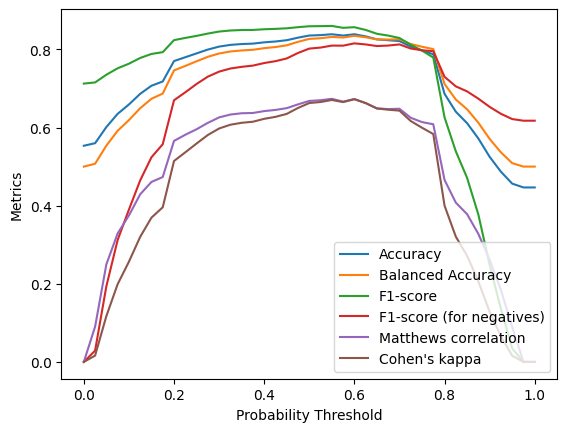

In [62]:
plt.plot(accuracy_thresholds,accuracy_scores_svm_rbf)
plt.plot(accuracy_thresholds,balanced_accuracy_scores_svm_rbf)
plt.plot(accuracy_thresholds,f1_scores_svm_rbf)
plt.plot(accuracy_thresholds,f1_scores_neg_svm_rbf)
plt.plot(accuracy_thresholds,matthews_corrcoefs_svm_rbf)
plt.plot(accuracy_thresholds,cohen_kappa_scores_svm_rbf)

plt.legend(['Accuracy','Balanced Accuracy','F1-score','F1-score (for negatives)','Matthews correlation',"Cohen's kappa"], loc="lower right")
plt.xlabel('Probability Threshold')
plt.ylabel('Metrics');

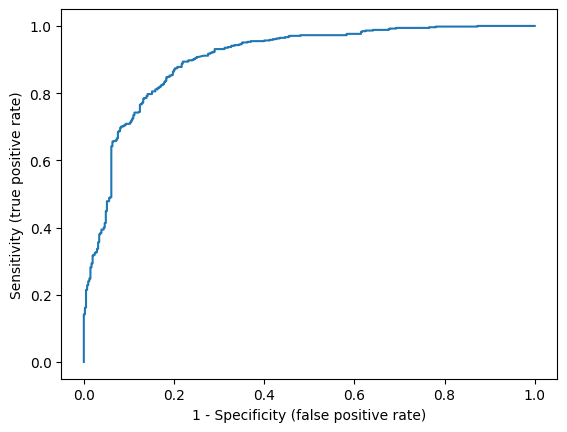

In [63]:
fpr, tpr, thresholds = roc_curve(obs_heart,pred_prob_heart_svm_rbf[:,1])
plt.plot(fpr,tpr)
plt.xlabel('1 - Specificity (false positive rate)')
plt.ylabel('Sensitivity (true positive rate)');

In [64]:
roc_auc_score(obs_heart,pred_prob_heart_svm_rbf[:,1])

0.9037353562512004

In [65]:
log_loss(obs_heart, pred_prob_heart_svm_rbf[:,1])

0.398517381961572

In [66]:
brier_score_loss(obs_heart,pred_prob_heart_svm_rbf[:,1])

0.12359762935625546

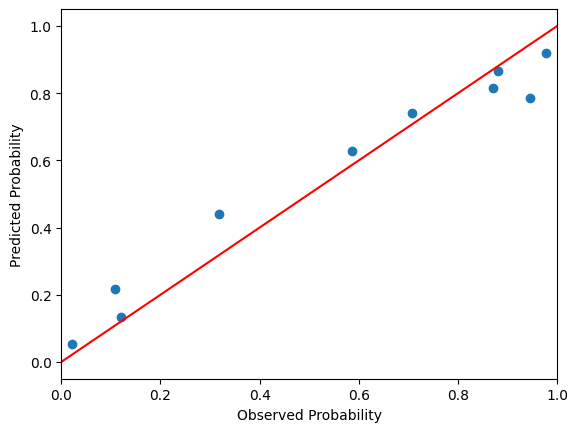

In [67]:
prob_true_svm_rbf, prob_pred_svm_rbf = calibration_curve(obs_heart,pred_prob_heart_svm_rbf[:,1], n_bins=10, strategy = 'quantile')
sm.graphics.abline_plot(intercept = 0,slope = 1,color = 'red')
plt.scatter(prob_true_svm_rbf,prob_pred_svm_rbf)
plt.xlabel('Observed Probability')
plt.ylabel('Predicted Probability');

Let us also fit an SVM with a polynomial kernel of degree 3.

In [68]:
parameters_poly = {'kernel':['poly'], 'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100],'coef0':[0,1,10], 'degree':[3]}
svm_pipeline_heart_poly = make_pipeline(StandardScaler(),  GridSearchCV(estimator = svm.SVC(probability=True), param_grid = parameters_poly, scoring = 'balanced_accuracy'))
svm_pipeline_heart_poly.fit(X = heart_final.iloc[:,range(0,17)], y = heart_final['heart_disease'])
svm_pipeline_heart_poly._final_estimator.best_params_

{'C': 0.01, 'coef0': 1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}

In [69]:
pred_prob_heart_svm_poly = svm_pipeline_heart_poly.predict_proba(heart_final.iloc[:,range(0,17)])

accuracy_scores_svm_poly = np.zeros(41)
balanced_accuracy_scores_svm_poly = np.zeros(41)
f1_scores_svm_poly = np.zeros(41)
f1_scores_neg_svm_poly = np.zeros(41)
matthews_corrcoefs_svm_poly = np.zeros(41)
cohen_kappa_scores_svm_poly = np.zeros(41)

for k in range(41):
    accuracy_thresholds[k] = k/40
    accuracy_scores_svm_poly[k] = accuracy_score(obs_heart,(pred_prob_heart_svm_poly[:,1] > accuracy_thresholds[k]).astype(int))
    balanced_accuracy_scores_svm_poly[k] = balanced_accuracy_score(obs_heart,(pred_prob_heart_svm_poly[:,1] > accuracy_thresholds[k]).astype(int))
    f1_scores_svm_poly[k] = f1_score(obs_heart,(pred_prob_heart_svm_poly[:,1] > accuracy_thresholds[k]).astype(int))
    f1_scores_neg_svm_poly[k] = f1_score(obs_heart,(pred_prob_heart_svm_poly[:,1] > accuracy_thresholds[k]).astype(int),pos_label=0)
    matthews_corrcoefs_svm_poly[k] = matthews_corrcoef(obs_heart,(pred_prob_heart_svm_poly[:,1] > accuracy_thresholds[k]).astype(int))
    cohen_kappa_scores_svm_poly[k] = cohen_kappa_score(obs_heart,(pred_prob_heart_svm_poly[:,1] > accuracy_thresholds[k]).astype(int))

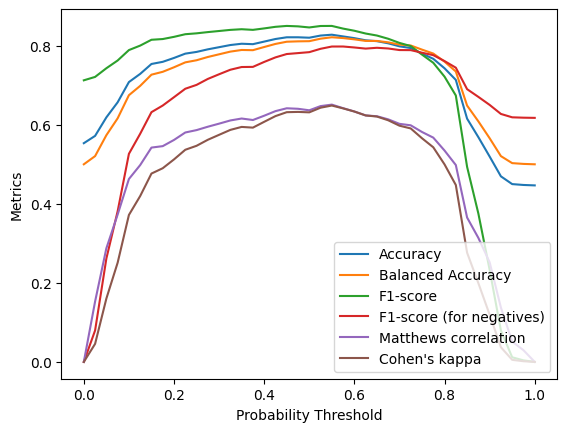

In [70]:
plt.plot(accuracy_thresholds,accuracy_scores_svm_poly)
plt.plot(accuracy_thresholds,balanced_accuracy_scores_svm_poly)
plt.plot(accuracy_thresholds,f1_scores_svm_poly)
plt.plot(accuracy_thresholds,f1_scores_neg_svm_poly)
plt.plot(accuracy_thresholds,matthews_corrcoefs_svm_poly)
plt.plot(accuracy_thresholds,cohen_kappa_scores_svm_poly)

plt.legend(['Accuracy','Balanced Accuracy','F1-score','F1-score (for negatives)','Matthews correlation',"Cohen's kappa"], loc="lower right")
plt.xlabel('Probability Threshold')
plt.ylabel('Metrics');

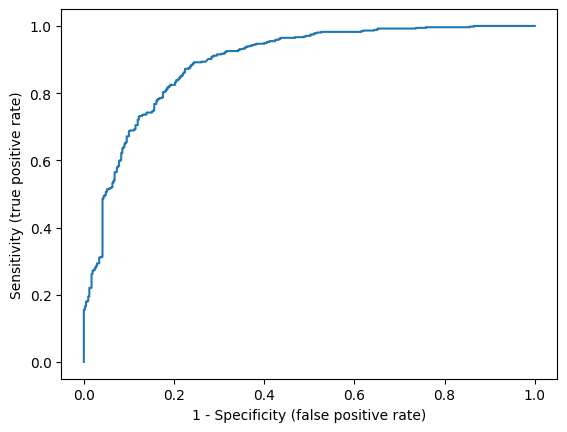

In [71]:
fpr, tpr, thresholds = roc_curve(obs_heart,pred_prob_heart_svm_poly[:,1])
plt.plot(fpr,tpr)
plt.xlabel('1 - Specificity (false positive rate)')
plt.ylabel('Sensitivity (true positive rate)');

In [72]:
roc_auc_score(obs_heart,pred_prob_heart_svm_poly[:,1])

0.8930238140964086

In [73]:
log_loss(obs_heart, pred_prob_heart_svm_poly[:,1])

0.4101565239019748

In [74]:
brier_score_loss(obs_heart,pred_prob_heart_svm_poly[:,1])

0.1291222175997344

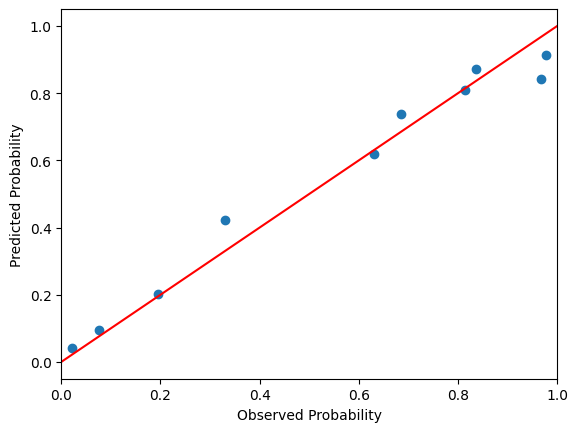

In [75]:
prob_true_svm_poly, prob_pred_svm_poly = calibration_curve(obs_heart,pred_prob_heart_svm_poly[:,1], n_bins=10, strategy = 'quantile')
sm.graphics.abline_plot(intercept = 0,slope = 1,color = 'red')
plt.scatter(prob_true_svm_poly,prob_pred_svm_poly)
plt.xlabel('Observed Probability')
plt.ylabel('Predicted Probability');

We observe that the fit is fairly similar to the radial kernel. Lastly, let us also check the sigmoid kernel. We will follow the advice from [[7](#7)] and consider positive values of $\gamma$, and both positive and negative values for the shift.

In [76]:
parameters_sig = {'kernel':['sigmoid'], 'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100],'coef0':[-10, -1, 0.1, 0, 0.1, 1, 10]}

svm_pipeline_heart_sig = make_pipeline(StandardScaler(),  GridSearchCV(estimator=svm.SVC(probability=True),param_grid=parameters_sig, scoring = 'balanced_accuracy'))
svm_pipeline_heart_sig.fit(X = heart_final.iloc[:,range(0,17)], y = heart_final['heart_disease'])
svm_pipeline_heart_sig._final_estimator.best_params_

{'C': 0.1, 'coef0': -1, 'gamma': 0.1, 'kernel': 'sigmoid'}

We notice that the optimal shift is indeed negative.

In [77]:
pred_prob_heart_svm_sig = svm_pipeline_heart_sig.predict_proba(heart_final.iloc[:,range(0,17)])

accuracy_scores_svm_sig = np.zeros(41)
balanced_accuracy_scores_svm_sig = np.zeros(41)
f1_scores_svm_sig = np.zeros(41)
f1_scores_neg_svm_sig = np.zeros(41)
matthews_corrcoefs_svm_sig = np.zeros(41)
cohen_kappa_scores_svm_sig = np.zeros(41)

for k in range(41):
    accuracy_thresholds[k] = k/40
    accuracy_scores_svm_sig[k] = accuracy_score(obs_heart,(pred_prob_heart_svm_sig[:,1] > accuracy_thresholds[k]).astype(int))
    balanced_accuracy_scores_svm_sig[k] = balanced_accuracy_score(obs_heart,(pred_prob_heart_svm_sig[:,1] > accuracy_thresholds[k]).astype(int))
    f1_scores_svm_sig[k] = f1_score(obs_heart,(pred_prob_heart_svm_sig[:,1] > accuracy_thresholds[k]).astype(int))
    f1_scores_neg_svm_sig[k] = f1_score(obs_heart,(pred_prob_heart_svm_sig[:,1] > accuracy_thresholds[k]).astype(int),pos_label=0)
    matthews_corrcoefs_svm_sig[k] = matthews_corrcoef(obs_heart,(pred_prob_heart_svm_sig[:,1] > accuracy_thresholds[k]).astype(int))
    cohen_kappa_scores_svm_sig[k] = cohen_kappa_score(obs_heart,(pred_prob_heart_svm_sig[:,1] > accuracy_thresholds[k]).astype(int))

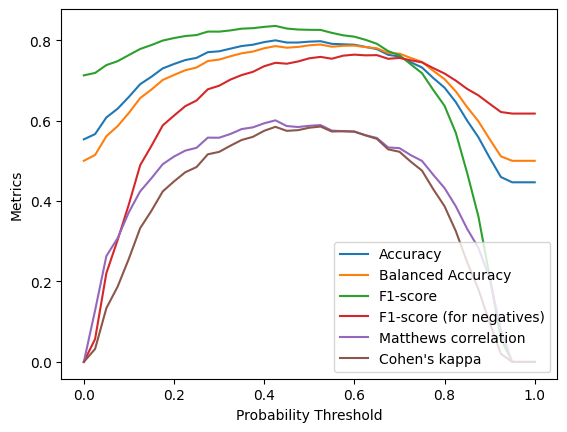

In [78]:
plt.plot(accuracy_thresholds,accuracy_scores_svm_sig)
plt.plot(accuracy_thresholds,balanced_accuracy_scores_svm_sig)
plt.plot(accuracy_thresholds,f1_scores_svm_sig)
plt.plot(accuracy_thresholds,f1_scores_neg_svm_sig)
plt.plot(accuracy_thresholds,matthews_corrcoefs_svm_sig)
plt.plot(accuracy_thresholds,cohen_kappa_scores_svm_sig)

plt.legend(['Accuracy','Balanced Accuracy','F1-score','F1-score (for negatives)','Matthews correlation',"Cohen's kappa"], loc="lower right")
plt.xlabel('Probability Threshold')
plt.ylabel('Metrics');

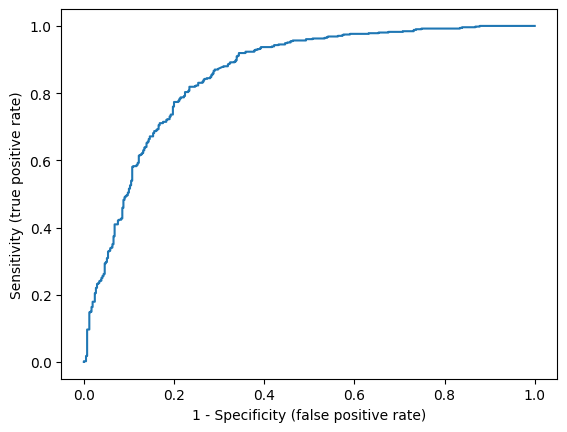

In [79]:
fpr, tpr, thresholds = roc_curve(obs_heart,pred_prob_heart_svm_sig[:,1])
plt.plot(fpr,tpr)
plt.xlabel('1 - Specificity (false positive rate)')
plt.ylabel('Sensitivity (true positive rate)');

In [80]:
roc_auc_score(obs_heart,pred_prob_heart_svm_sig[:,1])

0.8562800076819667

In [81]:
log_loss(obs_heart, pred_prob_heart_svm_sig[:,1])

0.45917082471530424

In [82]:
brier_score_loss(obs_heart,pred_prob_heart_svm_sig[:,1])

0.1469654553149286

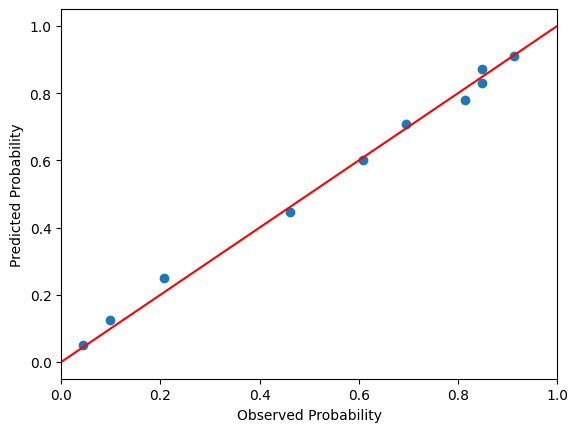

In [83]:
prob_true_svm_sig, prob_pred_svm_sig = calibration_curve(obs_heart,pred_prob_heart_svm_sig[:,1], n_bins=10, strategy = 'quantile')
sm.graphics.abline_plot(intercept = 0,slope = 1,color = 'red')
plt.scatter(prob_true_svm_sig,prob_pred_svm_sig)
plt.xlabel('Observed Probability')
plt.ylabel('Predicted Probability');

The results seem slightly worse for the sigmoid kernel than for the radial and polynomial kernels. 

## Quadratic Discriminant Analysis <a class="anchor" id="qda-heart"></a>

Quadratic discriminant analysis (QDA) is a straightforward generalization of LDA in which we do not assume that the covariance matrix of predictors $\Sigma$ is constant for each class. Instead, we consider a separate covariance matrix $\Sigma_k$ for each class. Consequently, instead of a linear decision boundary, QDA attains a more general quadratic decision boundary [[3](#3)].

In [84]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_heart = QuadraticDiscriminantAnalysis(store_covariance=True) # store_covariance=True to explicitly compute the covariance matrices
qda_heart.fit(X = heart_final.iloc[:,range(0,17)], y = heart_final['heart_disease']) 

pred_prob_heart_qda = qda_heart.predict_proba(heart_final.iloc[:,range(0,17)])

We can check that *fit* indeed estimates two covariance matrices.

In [85]:
len(qda_heart.covariance_)

2

The prediction metrics are as follows.

In [86]:
accuracy_scores_qda = np.zeros(41)
balanced_accuracy_scores_qda = np.zeros(41)
f1_scores_qda = np.zeros(41)
f1_scores_neg_qda = np.zeros(41)
matthews_corrcoefs_qda = np.zeros(41)
cohen_kappa_scores_qda = np.zeros(41)

for k in range(41):
    accuracy_thresholds[k] = k/40
    accuracy_scores_qda[k] = accuracy_score(obs_heart,(pred_prob_heart_qda[:,1] > accuracy_thresholds[k]).astype(int))
    balanced_accuracy_scores_qda[k] = balanced_accuracy_score(obs_heart,(pred_prob_heart_qda[:,1] > accuracy_thresholds[k]).astype(int))
    f1_scores_qda[k] = f1_score(obs_heart,(pred_prob_heart_qda[:,1] > accuracy_thresholds[k]).astype(int))
    f1_scores_neg_qda[k] = f1_score(obs_heart,(pred_prob_heart_qda[:,1] > accuracy_thresholds[k]).astype(int),pos_label=0)
    matthews_corrcoefs_qda[k] = matthews_corrcoef(obs_heart,(pred_prob_heart_qda[:,1] > accuracy_thresholds[k]).astype(int))
    cohen_kappa_scores_qda[k] = cohen_kappa_score(obs_heart,(pred_prob_heart_qda[:,1] > accuracy_thresholds[k]).astype(int))

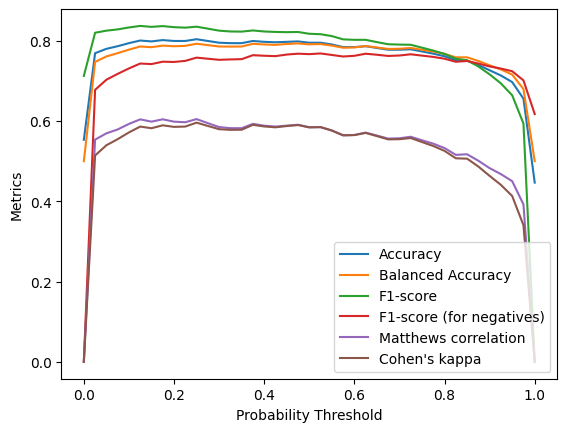

In [87]:
plt.plot(accuracy_thresholds,accuracy_scores_qda)
plt.plot(accuracy_thresholds,balanced_accuracy_scores_qda)
plt.plot(accuracy_thresholds,f1_scores_qda)
plt.plot(accuracy_thresholds,f1_scores_neg_qda)
plt.plot(accuracy_thresholds,matthews_corrcoefs_qda)
plt.plot(accuracy_thresholds,cohen_kappa_scores_qda)

plt.legend(['Accuracy','Balanced Accuracy','F1-score','F1-score (for negatives)','Matthews correlation',"Cohen's kappa"], loc="lower right")
plt.xlabel('Probability Threshold')
plt.ylabel('Metrics');

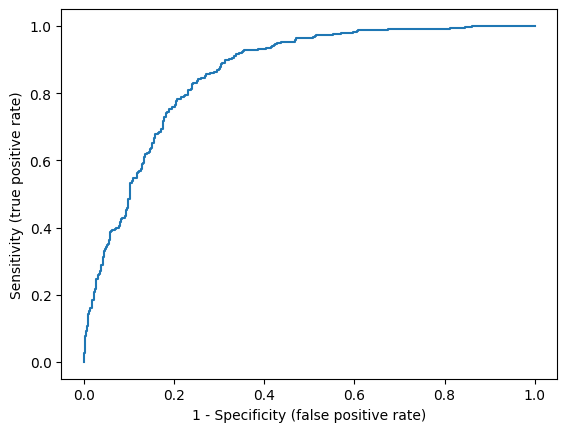

In [88]:
fpr, tpr, thresholds = roc_curve(obs_heart,pred_prob_heart_qda[:,1])
plt.plot(fpr,tpr)
plt.xlabel('1 - Specificity (false positive rate)')
plt.ylabel('Sensitivity (true positive rate)');

In [89]:
roc_auc_score(obs_heart,pred_prob_heart_qda[:,1])

0.8591031304013828

In [90]:
log_loss(obs_heart, pred_prob_heart_qda[:,1])

0.6929275271270017

In [91]:
brier_score_loss(obs_heart,pred_prob_heart_qda[:,1])

0.16461984447517047

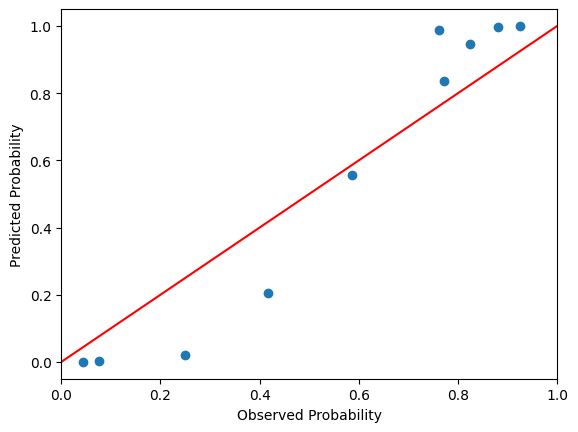

In [92]:
prob_true_qda, prob_pred_qda = calibration_curve(obs_heart,pred_prob_heart_qda[:,1], n_bins=10, strategy = 'quantile')
sm.graphics.abline_plot(intercept = 0,slope = 1,color = 'red')
plt.scatter(prob_true_qda,prob_pred_qda)
plt.xlabel('Observed Probability')
plt.ylabel('Predicted Probability');

We observe that AUC improved slightly compared to logistic regression, LDA, and linear SVM; however, the Brier score and log loss are slightly worse. In addition, calibration is also noticeably off. To demonstrate what is happening, let us plot the histograms for the predicted probabilities.

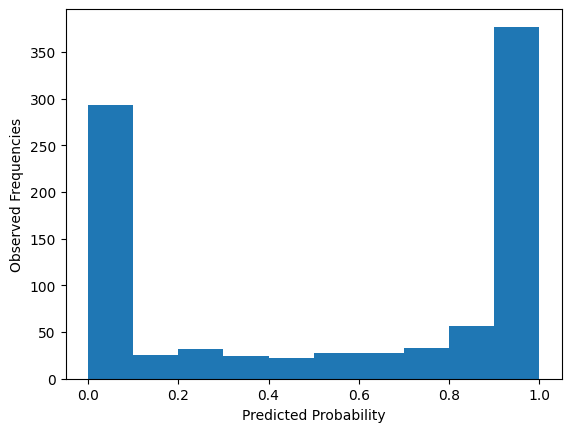

In [93]:
plt.hist(pred_prob_heart_qda[:,1])
plt.xlabel('Predicted Probability')
plt.ylabel('Observed Frequencies');

We observe that the probabilities are skewed way too much to 0 and 1 (i.e., the classifier is overconfident). For a comparison, let us plot the probabilities for the logistic regression model.

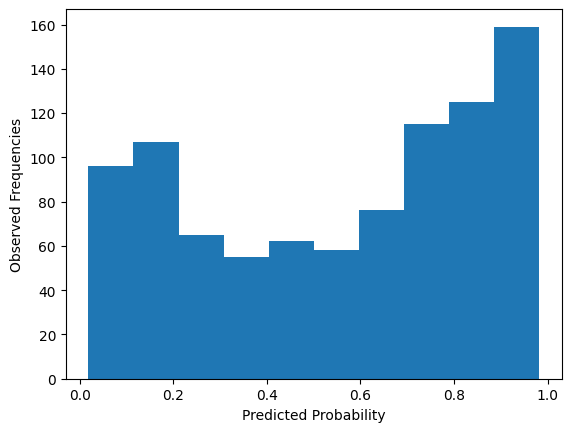

In [94]:
plt.hist(pred_prob_heart);
plt.xlabel('Predicted Probability')
plt.ylabel('Observed Frequencies');

We can attempt to fix the apparent issue with probability predictions by recalibrating the model using Platt’s scaling (as we did to obtain probability predictions from SVM).

In [95]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_qda_heart = CalibratedClassifierCV(qda_heart)
calibrated_qda_heart.fit(X = heart_final.iloc[:,range(0,17)], y = heart_final['heart_disease']) 

pred_prob_heart_qda_calibrated = calibrated_qda_heart.predict_proba(heart_final.iloc[:,range(0,17)])

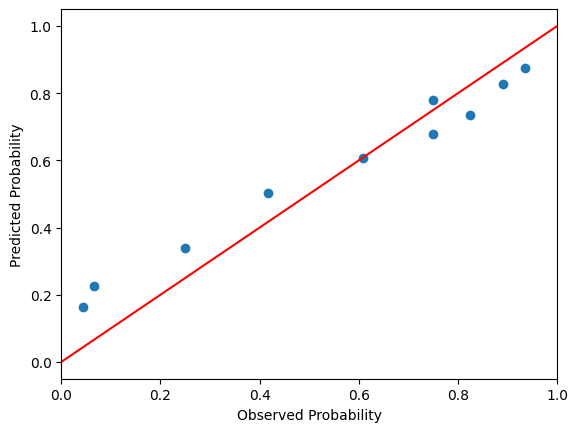

In [96]:
prob_true_qda_calibrated, prob_pred_qda_calibrated = calibration_curve(obs_heart,pred_prob_heart_qda_calibrated[:,1], n_bins=10, strategy = 'quantile')
sm.graphics.abline_plot(intercept = 0,slope = 1,color = 'red')
plt.scatter(prob_true_qda_calibrated,prob_pred_qda_calibrated)
plt.xlabel('Observed Probability')
plt.ylabel('Predicted Probability');

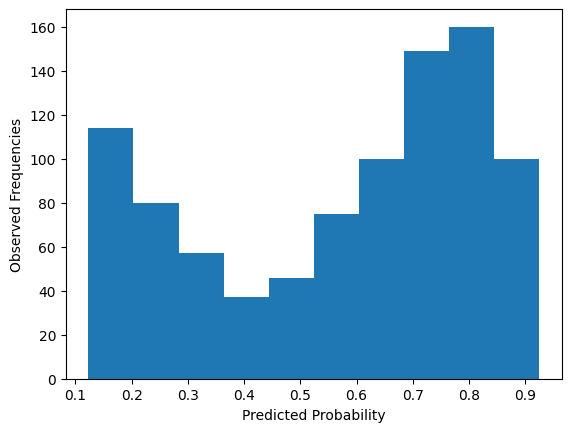

In [97]:
plt.hist(pred_prob_heart_qda_calibrated[:,1]);
plt.xlabel('Predicted Probability')
plt.ylabel('Observed Frequencies');

We observe  that the calibration noticeably improved. Let us investigate the effect on the metrics.

In [98]:
roc_auc_score(obs_heart,pred_prob_heart_qda_calibrated[:,1])

0.8629681198386786

In [99]:
log_loss(obs_heart, pred_prob_heart_qda_calibrated[:,1])

0.4729022130239288

In [100]:
brier_score_loss(obs_heart,pred_prob_heart_qda_calibrated[:,1])

0.1506190703672272

After recalibration, the Brier score and log loss improved dramatically, bringing QDA's performance metrics into line with those of other classifiers.

## Naive Bayes <a class="anchor" id="nb-heart"></a>

Naive Bayes is another popular generative method. It assumes that the predictors $X$ are conditionally independent (for each class $Y$), i.e., $P(X|Y) = P(X_1|Y)P(X_2|Y)\ldots$. Naturally, this assumption is often unrealistic; however, it allows us to replace the computationally challenging estimation of the joint probability $P(X|Y)$ with simple, scalable estimation of marginal densities. 

The class conditional probability using the Bayes rule is $P(Y = k|X = x) = \frac{\pi_k \Pi_iP(X = x_i |Y = k)}{\sum_j\pi_j \Pi_iP(X = x_i |Y = j)}$, where $\pi_Y$ is the prior class probability. Consequently, the log odds under the conditional independence condition is $$\mathrm{log}\frac{p}{1-p} = \mathrm{log}\frac{\pi_1\Pi_i P(X_i|Y =1)}{\pi_0\Pi_i P(X_i|Y =0)} = \mathrm{log} \frac{\pi_1}{\pi_0} + \sum_i\mathrm{log}\frac{P(X_i|Y =1)}{ P(X_i|Y =0)} = \mathrm{log} \frac{\pi_1}{\pi_0} + \sum_i f(X_i),$$ which is the form of a *generalized additive model* [[2](#2)].  Hence, a generalized additive logistic model is a discriminative analogue to naive Bayes, just as logistic regression is a discriminative analogue to LDA.

For estimating densities, the density of continuous predictors can be approximated by a normal distribution. Alternatively, we could use a nonparametric density estimate, corresponding to the smooths used in generalized additive models. The categorical predictors can be naturally modeled by observed proportions [[3](#3)]. 

In *sklearn*, our choices for naive Bayes are a bit limited (https://scikit-learn.org/stable/api/sklearn.naive_bayes.html); we do not have a nonparametric density estimate available, and crucially, mixing and matching appropriate densities is not built in. Hence, we have to do a bit of coding to obtain a proper naive Bayes classifier. First, we obtain density estimates for the continuous predictors using a Gaussian naive Bayes classifier, *GaussianNB*.

In [101]:
from sklearn.naive_bayes import GaussianNB
gaussNB_heart = GaussianNB()
gaussNB_heart.fit(heart_final[['age','trestbps','chol','thalch','oldpeak']], y = heart_final['heart_disease']);

Next, we fit a categorical naive Bayes via *CategoricalNB*

In [102]:
from sklearn.naive_bayes import CategoricalNB
catNB_heart = CategoricalNB()
catNB_heart.fit(heart_imp_MissForest[['sex','cp','restecg','exang','fbs','slope','thal']], y = heart_final['heart_disease']);

We need to compute the conditional probability $P(Y|X)$ from *GaussianNB* and *CategoricalNB*. First, we extract log join probabilities $\mathrm{log} P(X_{\mathrm{cont}},Y)$ and $\mathrm{log} P(X_{\mathrm{cat}},Y)$.

In [103]:
# log P(X_1,Y) and log P(X_2,Y)
joint_logprob_cont_heart =  gaussNB_heart.predict_joint_log_proba(heart_final[['age','trestbps','chol','thalch','oldpeak']])
joint_logprob_cat_heart =  catNB_heart.predict_joint_log_proba(heart_imp_MissForest[['sex','cp','restecg','exang','fbs','slope','thal']])

Next, we use that $P(X_{\mathrm{cont}}|Y) = P(X_{\mathrm{cont}},Y)/\pi_Y$ and $P(X_\mathrm{cat}|Y) = P(X_{\mathrm{cat}},Y)/\pi_Y$  and the fact that $X_\mathrm{cont}$ and $X_\mathrm{cat}$ are conditionally independent. Consequently, we obtain  $P(X|Y) = P(X_{\mathrm{cont}}|Y)P(X_\mathrm{cat}|Y) = P(X_{\mathrm{cont}},Y)P(X_{\mathrm{cat}},Y)/(\pi_Y)^2$. Thus, we obtain from the Bayes theorem $$P(Y|X) = \frac{P(X|Y)\pi_Y}{\sum_Y P(X|Y)\pi_Y} = \frac{P(X_{\mathrm{cont}},Y)P(X_{\mathrm{cat}},Y)/\pi_Y}{\sum_Y P(X_{\mathrm{cont}},Y)P(X_{\mathrm{cat}},Y)/\pi_Y}.$$

In [104]:
pred_prob_heart_nb = np.exp(joint_logprob_cont_heart - catNB_heart.class_log_prior_ + joint_logprob_cat_heart) # compute numerator
pred_prob_heart_nb = np.divide(pred_prob_heart_nb.T,pred_prob_heart_nb.sum(axis = 1)).T # normalize the density

In [105]:
accuracy_scores_nb = np.zeros(41)
balanced_accuracy_scores_nb = np.zeros(41)
f1_scores_nb = np.zeros(41)
f1_scores_neg_nb = np.zeros(41)
matthews_corrcoefs_nb = np.zeros(41)
cohen_kappa_scores_nb = np.zeros(41)

for k in range(41):
    accuracy_thresholds[k] = k/40
    accuracy_scores_nb[k] = accuracy_score(obs_heart,(pred_prob_heart_nb[:,1] > accuracy_thresholds[k]).astype(int))
    balanced_accuracy_scores_nb[k] = balanced_accuracy_score(obs_heart,(pred_prob_heart_nb[:,1] > accuracy_thresholds[k]).astype(int))
    f1_scores_nb[k] = f1_score(obs_heart,(pred_prob_heart_nb[:,1] > accuracy_thresholds[k]).astype(int))
    f1_scores_neg_nb[k] = f1_score(obs_heart,(pred_prob_heart_nb[:,1] > accuracy_thresholds[k]).astype(int),pos_label=0)
    matthews_corrcoefs_nb[k] = matthews_corrcoef(obs_heart,(pred_prob_heart_nb[:,1] > accuracy_thresholds[k]).astype(int))
    cohen_kappa_scores_nb[k] = cohen_kappa_score(obs_heart,(pred_prob_heart_nb[:,1] > accuracy_thresholds[k]).astype(int))

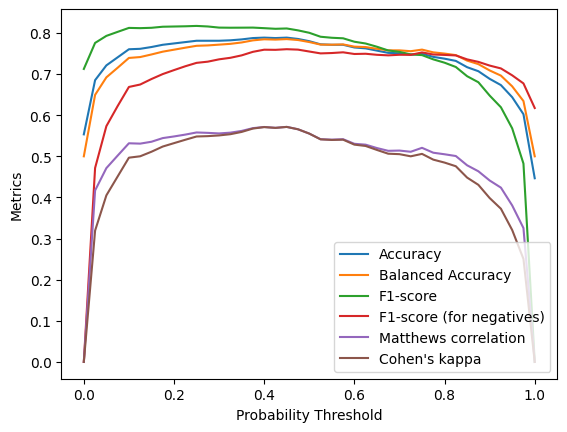

In [106]:
plt.plot(accuracy_thresholds,accuracy_scores_nb)
plt.plot(accuracy_thresholds,balanced_accuracy_scores_nb)
plt.plot(accuracy_thresholds,f1_scores_nb)
plt.plot(accuracy_thresholds,f1_scores_neg_nb)
plt.plot(accuracy_thresholds,matthews_corrcoefs_nb)
plt.plot(accuracy_thresholds,cohen_kappa_scores_nb)

plt.legend(['Accuracy','Balanced Accuracy','F1-score','F1-score (for negatives)','Matthews correlation',"Cohen's kappa"], loc="lower right")
plt.xlabel('Probability Threshold')
plt.ylabel('Metrics');

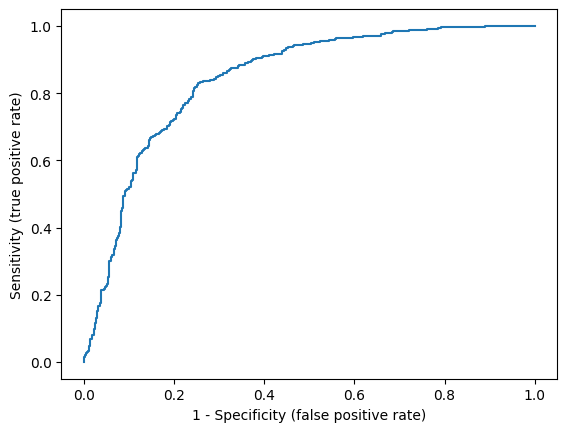

In [107]:
fpr, tpr, thresholds = roc_curve(obs_heart,pred_prob_heart_nb[:,1])
plt.plot(fpr,tpr)
plt.xlabel('1 - Specificity (false positive rate)')
plt.ylabel('Sensitivity (true positive rate)');

In [108]:
roc_auc_score(obs_heart,pred_prob_heart_nb[:,1])

0.8430382177837527

In [109]:
log_loss(obs_heart, pred_prob_heart_nb[:,1])

0.6071737399419606

In [110]:
brier_score_loss(obs_heart,pred_prob_heart_nb[:,1])

0.1669868401330874

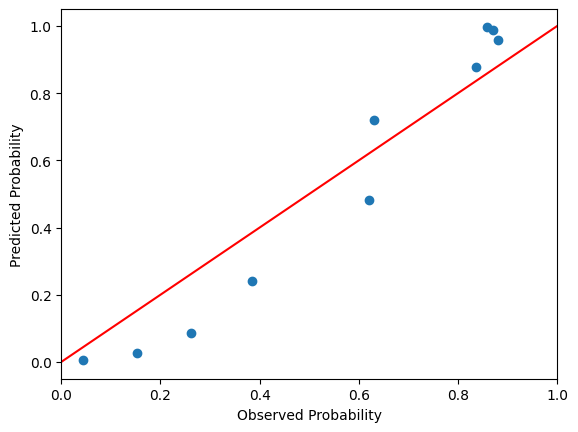

In [111]:
prob_true_nb, prob_pred_nb = calibration_curve(obs_heart,pred_prob_heart_nb[:,1], n_bins=10, strategy = 'quantile')
sm.graphics.abline_plot(intercept = 0,slope = 1,color = 'red')
plt.scatter(prob_true_nb,prob_pred_nb)
plt.xlabel('Observed Probability')
plt.ylabel('Predicted Probability');

We observe that the naive Bayes classifier is slightly miscalibrated. This is actually quite typical since naive Bayes tends to push probabilities to 0 or 1 [[9](#9)].

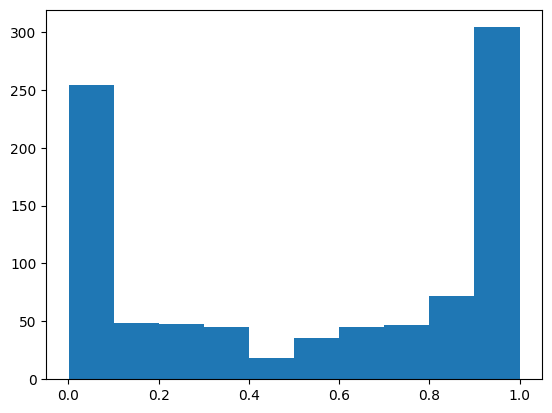

In [112]:
plt.hist(pred_prob_heart_nb[:,1]);

Let us recalibrate the model as we did with the QDA classifier. Since we implemented the predicted probabilities by hand (and we did not implement the whole estimator), we cannot use *CalibratedClassifierCV*. However, the implementation is relatively straightforward. We use cross-validation to learn the calibration coefficients; we learn the model on the train subset of the train set and calibration coefficients are learned from the test subset of the train set.

In [113]:
from sklearn.model_selection import KFold
np.random.seed(123)

folds = 5
kf = KFold(n_splits=folds) # create folds

calib_coef =  pd.DataFrame(index=range(folds),columns = ['intercept','slope'])


idx_cv = np.random.choice([*range(len(heart_final))],len(heart_final), replace=False)
for j, (train_index, test_index) in enumerate(kf.split(idx_cv)):
    train_set = idx_cv[train_index]
    test_set = idx_cv[test_index]

    # split the train set
    heart_final_train = heart_final.iloc[train_set]
    heart_final_test = heart_final.iloc[test_set]
        
    heart_imp_MissForest_train = heart_imp_MissForest.iloc[train_set]
    heart_imp_MissForest_test = heart_imp_MissForest.iloc[test_set]

    # learn the naive Bayes classifier
    gaussNB_heart_new = GaussianNB()
    catNB_heart_new = CategoricalNB()
        
    gaussNB_heart_new.fit(heart_final_train[['age','trestbps','chol','thalch','oldpeak']], y = heart_final_train['heart_disease'])
    catNB_heart_new.fit(heart_imp_MissForest_train[['sex','cp','restecg','exang','fbs','slope','thal']], y = heart_final_train['heart_disease'])

    # obtain predicted probabilities for the test subset
    joint_logprob_cont_heart_new =  gaussNB_heart_new.predict_joint_log_proba(heart_final_test[['age','trestbps','chol','thalch','oldpeak']])
    joint_logprob_cat_heart_new =  catNB_heart_new.predict_joint_log_proba(heart_imp_MissForest_test[['sex','cp','restecg','exang','fbs','slope','thal']])
    pred_prob_heart_nb_new = np.exp(joint_logprob_cont_heart_new - catNB_heart_new.class_log_prior_ + joint_logprob_cat_heart_new) 
    pred_prob_heart_nb_new = np.divide(pred_prob_heart_nb_new.T,pred_prob_heart_nb_new.sum(axis = 1)).T 

    # fit the logit model on the test subset and extract coefficients
    logitp_nb = np.log(pred_prob_heart_nb_new[:,1]/(1-pred_prob_heart_nb_new[:,1])) # logit p = log p/(1-p)

    calib_model_fit = sm.Logit(endog = heart_final_test['heart_disease'].reset_index(drop = True),exog = pd.DataFrame(logitp_nb).assign(const=1)).fit(disp=0) #logit model
    calib_coef.iloc[j,0] = calib_model_fit.params.iloc[1]
    calib_coef.iloc[j,1] = calib_model_fit.params.iloc[0]


We obtained the following parameters from the cross-validation. 

In [114]:
calib_coef.mean()

intercept    0.127849
slope        0.432648
dtype: object

Hence, we get the following calibrated probabilities.

In [115]:
logitp_nb_all = np.log(pred_prob_heart_nb[:,1]/(1-pred_prob_heart_nb[:,1])) # logit p = log p/(1-p)
pred_prob_heart_nb_calib =  1 - 1/(1+np.exp(calib_coef.mean().iloc[1]*logitp_nb_all + calib_coef.mean().iloc[0])) #p_cal = ilogit(slope*log p/(1-p) + intercept)

In [116]:
roc_auc_score(obs_heart,pred_prob_heart_nb_calib)

0.8430382177837527

In [117]:
log_loss(obs_heart, pred_prob_heart_nb_calib)

0.4950402138362559

In [118]:
brier_score_loss(obs_heart,pred_prob_heart_nb_calib)

0.1576069591133016

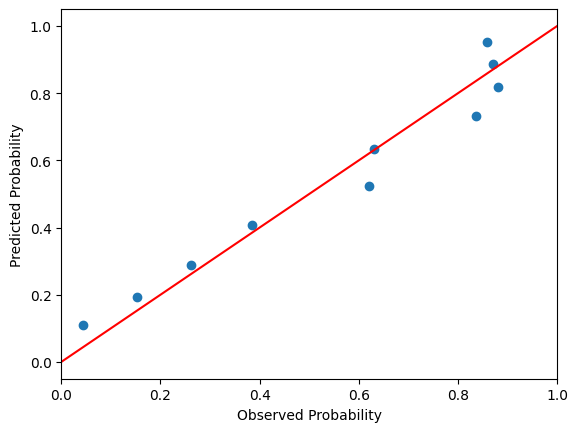

In [119]:
prob_true_nb_calib, prob_pred_nb_calib = calibration_curve(obs_heart,pred_prob_heart_nb_calib, n_bins=10, strategy = 'quantile')
sm.graphics.abline_plot(intercept = 0,slope = 1,color = 'red')
plt.scatter(prob_true_nb_calib,prob_pred_nb_calib)
plt.xlabel('Observed Probability')
plt.ylabel('Predicted Probability');

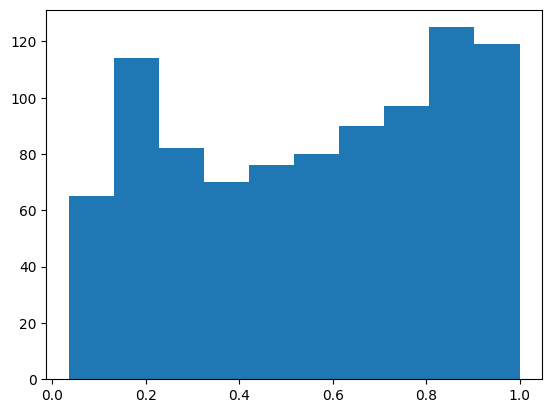

In [120]:
plt.hist(pred_prob_heart_nb_calib);

We observed that calibration again significantly reduced the Brier score and the log loss.

## Validation <a class="anchor" id="valid"></a>

Let us validate all our models from this project. We will simplify cross-validation a bit (primarily to speed up computations) by omitting the imputation step, since we are mainly interested in comparing classifiers rather than estimating classification error in predicting the presence of heart disease itself anyway. 

In [121]:
# cross-validation
np.random.seed(123)

rep = 50
folds = 10
kf = KFold(n_splits=10) # create folds

metrics_cv_heart_log_reg =  pd.DataFrame(index=range(rep*folds),columns = ['AUC','Brier score','log score','calibration'])
metrics_cv_heart_lda =  pd.DataFrame(index=range(rep*folds),columns = ['AUC','Brier score','log score','calibration'])
metrics_cv_heart_linear_svm =  pd.DataFrame(index=range(rep*folds),columns = ['AUC','Brier score','log score','calibration'])
metrics_cv_heart_rbf_svm =  pd.DataFrame(index=range(rep*folds),columns = ['AUC','Brier score','log score','calibration'])
metrics_cv_heart_poly_svm =  pd.DataFrame(index=range(rep*folds),columns = ['AUC','Brier score','log score','calibration'])
metrics_cv_heart_sig_svm =  pd.DataFrame(index=range(rep*folds),columns = ['AUC','Brier score','log score','calibration'])
metrics_cv_heart_qda =  pd.DataFrame(index=range(rep*folds),columns = ['AUC','Brier score','log score','calibration'])
metrics_cv_heart_nb =  pd.DataFrame(index=range(rep*folds),columns = ['AUC','Brier score','log score','calibration'])


parameters_svm_linear = {'kernel':['linear'], 'C':[0.001, 0.01, 0.1, 1, 10, 100]}
parameters_svm_rbf = {'kernel':['rbf'], 'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
parameters_svm_poly = {'kernel':['poly'], 'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100],'coef0':[0,1,10], 'degree':[3]}
parameters_svm_sig = {'kernel':['sigmoid'], 'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100],'coef0':[-10, -1, 0.1, 0, 0.1, 1, 10]}

k = 0

for i in range(rep):
    
    idx_cv = np.random.choice([*range(len(heart_final))],len(heart_final), replace=False)
    
    for j, (train_index, test_index) in enumerate(kf.split(idx_cv)):
        
        train_set = idx_cv[train_index]
        test_set = idx_cv[test_index]
        
        heart_train = heart_final.iloc[train_set]
        heart_test = heart_final.iloc[test_set]
        
        heart_imp_train = heart_imp_MissForest.iloc[train_set] # train set for NB
        heart_imp_test = heart_imp_MissForest.iloc[test_set] # train set for NB
        
        
        # logit
        log_reg_new = smf.logit(formula='heart_disease ~ age + sex + cp_typ + cp_atyp + cp_nonang + restecg_hypertrophy + \
                                  restecg_stt + thalch + exang + trestbps + oldpeak + fbs + chol + slope_down + slope_up + \
                                  thal_rev + thal_fixed', data=heart_final)
                                  
        pred_prob_log_reg_new = log_reg_new.fit(disp=0).predict(heart_test)
        logitp_log_reg_new = np.log(pred_prob_log_reg_new/(1-pred_prob_log_reg_new)) 
        
        metrics_cv_heart_log_reg.iloc[k,0] = roc_auc_score(heart_test['heart_disease'],pred_prob_log_reg_new)
        metrics_cv_heart_log_reg.iloc[k,1] = brier_score_loss(heart_test['heart_disease'],pred_prob_log_reg_new)
        metrics_cv_heart_log_reg.iloc[k,2] = log_loss(heart_test['heart_disease'],pred_prob_log_reg_new)
        metrics_cv_heart_log_reg.iloc[k,3] = sm.Logit(endog= heart_test['heart_disease'],exog = pd.DataFrame(logitp_log_reg_new).assign(const=1)).fit(disp=0).params.iloc[0]
        

        # LDA
        lda_new = LinearDiscriminantAnalysis(store_covariance=True)
        lda_new.fit(X = heart_train.iloc[:,range(0,17)], y = heart_train['heart_disease']) 
        pred_heart_lda_new = lda_new.predict_proba(heart_test.iloc[:,range(0,17)])[:,1]
        logitp_lda_new = np.log(pred_heart_lda_new/(1-pred_heart_lda_new))
        
        metrics_cv_heart_lda.iloc[k,0] = roc_auc_score(heart_test['heart_disease'],pred_heart_lda_new)
        metrics_cv_heart_lda.iloc[k,1] = brier_score_loss(heart_test['heart_disease'],pred_heart_lda_new)
        metrics_cv_heart_lda.iloc[k,2] = log_loss(heart_test['heart_disease'],pred_heart_lda_new)
        metrics_cv_heart_lda.iloc[k,3] = sm.Logit(endog= heart_test['heart_disease'].reset_index(drop=True),exog = pd.DataFrame(logitp_lda_new).assign(const=1)).fit(disp=0).params.iloc[0]
        
        
        # linear SVM
        svm_linear_pipeline_new = make_pipeline(StandardScaler(),  GridSearchCV(estimator=svm.SVC(),param_grid=parameters_svm_linear, scoring = 'balanced_accuracy', refit=False, n_jobs = 4))
        svm_linear_pipeline_new.fit(X = heart_train.iloc[:,range(0,17)], y = heart_train['heart_disease'])
        svm_linear_params_new = svm_linear_pipeline_new._final_estimator.best_params_
        
        svm_linear_pipeline_new2 = make_pipeline(StandardScaler(),  svm.SVC(C=svm_linear_params_new['C'], kernel = 'linear', probability = True))
        svm_linear_pipeline_new2.fit(X = heart_train.iloc[:,range(0,17)], y = heart_train['heart_disease'])
        
        pred_prob_linear_svm_new = svm_linear_pipeline_new2.predict_proba(heart_test.iloc[:,range(0,17)])[:,1]
        logitp_linear_svm_new = np.log(pred_prob_linear_svm_new/(1-pred_prob_linear_svm_new))
        
        metrics_cv_heart_linear_svm.iloc[k,0] = roc_auc_score(heart_test['heart_disease'],pred_prob_linear_svm_new)
        metrics_cv_heart_linear_svm.iloc[k,1] = brier_score_loss(heart_test['heart_disease'],pred_prob_linear_svm_new)
        metrics_cv_heart_linear_svm.iloc[k,2] = log_loss(heart_test['heart_disease'],pred_prob_linear_svm_new)
        metrics_cv_heart_linear_svm.iloc[k,3] = sm.Logit(endog= heart_test['heart_disease'].reset_index(drop=True),exog = pd.DataFrame(logitp_linear_svm_new).assign(const=1)).fit(disp=0).params.iloc[0]
        
        
        # rbf SVM
        svm_rbf_pipeline_new = make_pipeline(StandardScaler(),  GridSearchCV(estimator=svm.SVC(),param_grid=parameters_svm_rbf, scoring = 'balanced_accuracy', refit=False, n_jobs = 4))
        svm_rbf_pipeline_new.fit(X = heart_train.iloc[:,range(0,17)], y = heart_train['heart_disease'])
        
        svm_rbf_params_new = svm_rbf_pipeline_new._final_estimator.best_params_
        svm_rbf_pipeline_new2 = make_pipeline(StandardScaler(),  svm.SVC(C=svm_rbf_params_new['C'], gamma = svm_rbf_params_new['gamma'], kernel = 'rbf', probability = True))
        svm_rbf_pipeline_new2.fit(X = heart_train.iloc[:,range(0,17)], y = heart_train['heart_disease'])
        
        pred_prob_rbf_svm_new = svm_rbf_pipeline_new2.predict_proba(heart_test.iloc[:,range(0,17)])[:,1]
        logitp_rbf_svm_new = np.log(pred_prob_rbf_svm_new/(1-pred_prob_rbf_svm_new))
        
        metrics_cv_heart_rbf_svm.iloc[k,0] = roc_auc_score(heart_test['heart_disease'],pred_prob_rbf_svm_new)
        metrics_cv_heart_rbf_svm.iloc[k,1] = brier_score_loss(heart_test['heart_disease'],pred_prob_rbf_svm_new)
        metrics_cv_heart_rbf_svm.iloc[k,2] = log_loss(heart_test['heart_disease'],pred_prob_rbf_svm_new)
        metrics_cv_heart_rbf_svm.iloc[k,3] = sm.Logit(endog= heart_test['heart_disease'].reset_index(drop=True),exog = pd.DataFrame(logitp_rbf_svm_new).assign(const=1)).fit(disp=0).params.iloc[0]
        
        
        # poly SVM
        svm_poly_pipeline_new = make_pipeline(StandardScaler(),  GridSearchCV(estimator=svm.SVC(),param_grid=parameters_svm_poly, scoring = 'balanced_accuracy', refit=False, n_jobs = 4))
        svm_poly_pipeline_new.fit(X = heart_train.iloc[:,range(0,17)], y = heart_train['heart_disease'])
        
        svm_poly_params_new = svm_poly_pipeline_new._final_estimator.best_params_
        svm_poly_pipeline_new2 = make_pipeline(StandardScaler(),  svm.SVC(C=svm_poly_params_new['C'], gamma = svm_poly_params_new['gamma'], coef0 = svm_poly_params_new['coef0'], kernel = 'poly', degree = 3, probability = True))
        svm_poly_pipeline_new2.fit(X = heart_train.iloc[:,range(0,17)], y = heart_train['heart_disease'])
        
        pred_prob_poly_svm_new = svm_poly_pipeline_new2.predict_proba(heart_test.iloc[:,range(0,17)])[:,1]
        logitp_poly_svm_new = np.log(pred_prob_poly_svm_new/(1-pred_prob_poly_svm_new))
        
        metrics_cv_heart_poly_svm.iloc[k,0] = roc_auc_score(heart_test['heart_disease'],pred_prob_poly_svm_new)
        metrics_cv_heart_poly_svm.iloc[k,1] = brier_score_loss(heart_test['heart_disease'],pred_prob_poly_svm_new)
        metrics_cv_heart_poly_svm.iloc[k,2] = log_loss(heart_test['heart_disease'],pred_prob_poly_svm_new)
        metrics_cv_heart_poly_svm.iloc[k,3] = sm.Logit(endog= heart_test['heart_disease'].reset_index(drop=True),exog = pd.DataFrame(logitp_poly_svm_new).assign(const=1)).fit(disp=0).params.iloc[0]
        
        
        # sig SVM
        svm_sig_pipeline_new = make_pipeline(StandardScaler(),  GridSearchCV(estimator=svm.SVC(),param_grid=parameters_svm_sig, scoring = 'balanced_accuracy', refit=False, n_jobs = 4))
        svm_sig_pipeline_new.fit(X = heart_train.iloc[:,range(0,17)], y = heart_train['heart_disease'])
        
        svm_sig_params_new = svm_sig_pipeline_new._final_estimator.best_params_
        svm_sig_pipeline_new2 = make_pipeline(StandardScaler(),  svm.SVC(C=svm_sig_params_new['C'], gamma = svm_sig_params_new['gamma'], coef0 = svm_sig_params_new['coef0'], kernel = 'sigmoid', probability = True))
        svm_sig_pipeline_new2.fit(X = heart_train.iloc[:,range(0,17)], y = heart_train['heart_disease'])
        

        pred_prob_sig_svm_new = svm_sig_pipeline_new2.predict_proba(heart_test.iloc[:,range(0,17)])[:,1]
        logitp_sig_svm_new = np.log(pred_prob_sig_svm_new/(1-pred_prob_sig_svm_new))
        
        metrics_cv_heart_sig_svm.iloc[k,0] = roc_auc_score(heart_test['heart_disease'],pred_prob_sig_svm_new)
        metrics_cv_heart_sig_svm.iloc[k,1] = brier_score_loss(heart_test['heart_disease'],pred_prob_sig_svm_new)
        metrics_cv_heart_sig_svm.iloc[k,2] = log_loss(heart_test['heart_disease'],pred_prob_sig_svm_new)
        metrics_cv_heart_sig_svm.iloc[k,3] = sm.Logit(endog= heart_test['heart_disease'].reset_index(drop=True),exog = pd.DataFrame(logitp_sig_svm_new).assign(const=1)).fit(disp=0).params.iloc[0]
        
        
        # QDA
        qda_new = QuadraticDiscriminantAnalysis()
        
        calibrated_qda_new = CalibratedClassifierCV(qda_new)
        calibrated_qda_new.fit(X = heart_train.iloc[:,range(0,17)], y = heart_train['heart_disease']) 
        pred_prob_heart_qda_calibrated = calibrated_qda_new.predict_proba(heart_test.iloc[:,range(0,17)])[:,1]
        
        logitp_qda_new = np.log(pred_prob_heart_qda_calibrated/(1-pred_prob_heart_qda_calibrated))

        metrics_cv_heart_qda.iloc[k,0] = roc_auc_score(heart_test['heart_disease'],pred_prob_heart_qda_calibrated)
        metrics_cv_heart_qda.iloc[k,1] = brier_score_loss(heart_test['heart_disease'],pred_prob_heart_qda_calibrated)
        metrics_cv_heart_qda.iloc[k,2] = log_loss(heart_test['heart_disease'],pred_prob_heart_qda_calibrated)
        metrics_cv_heart_qda.iloc[k,3] = sm.Logit(endog= heart_test['heart_disease'].reset_index(drop=True),exog = pd.DataFrame(logitp_qda_new).assign(const=1)).fit(disp=0).params.iloc[0]
        
    
        # NB    
        folds_inner = 5
        kf_inner = KFold(n_splits=folds_inner) # create folds

        calib_coef_new =  pd.DataFrame(index=range(folds_inner),columns = ['intercept','slope'])

        idx_cv_inner = np.random.choice([*range(len(heart_train))],len(heart_train), replace=False)
        
        for l, (train_index_inner, test_index_inner) in enumerate(kf_inner.split(idx_cv_inner)):
            train_set_inner = idx_cv_inner[train_index_inner]
            test_set_inner = idx_cv_inner[test_index_inner]

            # split the train set
            heart_train_inner = heart_train.iloc[train_set_inner]
            heart_test_inner = heart_train.iloc[test_set_inner]
                
            heart_imp_train_inner = heart_imp_train.iloc[train_set_inner]
            heart_imp_test_inner = heart_imp_train.iloc[test_set_inner]

            # learn the naive Bayes classifier
            gaussNB_new = GaussianNB()
            catNB_new = CategoricalNB()
                
            gaussNB_new.fit(heart_train_inner[['age','trestbps','chol','thalch','oldpeak']], y = heart_train_inner['heart_disease'])
            catNB_new.fit(heart_imp_train_inner[['sex','cp','restecg','exang','fbs','slope','thal']], y = heart_train_inner['heart_disease'])

            # obtain predicted probabilities for the test subset
            joint_logprob_cont_new =  gaussNB_new.predict_joint_log_proba(heart_test_inner[['age','trestbps','chol','thalch','oldpeak']])
            joint_logprob_cat_new =  catNB_new.predict_joint_log_proba(heart_imp_test_inner[['sex','cp','restecg','exang','fbs','slope','thal']])
            pred_prob_nb_new = np.exp(joint_logprob_cont_new - catNB_new.class_log_prior_ + joint_logprob_cat_new) 
            pred_prob_nb_new = np.divide(pred_prob_nb_new.T,pred_prob_nb_new.sum(axis = 1)).T 

            # fit the logit model on the test subset and extract coefficients
            logitp_nb_new = np.log(pred_prob_nb_new[:,1]/(1-pred_prob_nb_new[:,1])) # logit p = log p/(1-p)

            calib_model_fit_new = sm.Logit(endog = heart_test_inner['heart_disease'].reset_index(drop = True),exog = pd.DataFrame(logitp_nb_new).assign(const=1)).fit(disp=0) #logit model
            calib_coef_new.iloc[l,0] = calib_model_fit_new.params.iloc[1]
            calib_coef_new.iloc[l,1] = calib_model_fit_new.params.iloc[0]
            
            
        gaussNB_new = GaussianNB()
        catNB_new = CategoricalNB()
            
        gaussNB_new.fit(heart_train[['age','trestbps','chol','thalch','oldpeak']], y = heart_train['heart_disease'])
        catNB_new.fit(heart_imp_train[['sex','cp','restecg','exang','fbs','slope','thal']], y = heart_train['heart_disease'])


        joint_logprob_cont_new =  gaussNB_new.predict_joint_log_proba(heart_test[['age','trestbps','chol','thalch','oldpeak']])
        joint_logprob_cat_new =  catNB_new.predict_joint_log_proba(heart_imp_test[['sex','cp','restecg','exang','fbs','slope','thal']])
        pred_prob_nb_new = np.exp(joint_logprob_cont_new - catNB_new.class_log_prior_ + joint_logprob_cat_new)
        pred_prob_nb_new = np.divide(pred_prob_nb_new.T,pred_prob_nb_new.sum(axis = 1)).T # normalize the density
        

        logitp_nb_new = np.log(pred_prob_nb_new[:,1]/(1-pred_prob_nb_new[:,1]))
        pred_prob_nb_new_calib =  1 - 1/(1+np.exp(calib_coef_new.mean().iloc[1]*logitp_nb_new + calib_coef_new.mean().iloc[0]))
        logitp_nb_new_calib = np.log(pred_prob_nb_new_calib/(1-pred_prob_nb_new_calib))
        
        
        metrics_cv_heart_nb.iloc[k,0] = roc_auc_score(heart_test['heart_disease'],pred_prob_nb_new_calib)
        metrics_cv_heart_nb.iloc[k,1] = brier_score_loss(heart_test['heart_disease'],pred_prob_nb_new_calib)
        metrics_cv_heart_nb.iloc[k,2] = log_loss(heart_test['heart_disease'],pred_prob_nb_new_calib)
        metrics_cv_heart_nb.iloc[k,3] = sm.Logit(endog= heart_test['heart_disease'].reset_index(drop=True),exog = pd.DataFrame(logitp_nb_new_calib).assign(const=1)).fit(disp=0).params.iloc[0]


        k = k + 1

In [122]:
res = pd.concat([metrics_cv_heart_log_reg.mean(),\
                 metrics_cv_heart_lda.mean(),\
                 metrics_cv_heart_linear_svm.mean(),\
                 metrics_cv_heart_rbf_svm.mean(),\
                 metrics_cv_heart_poly_svm.mean(),\
                 metrics_cv_heart_sig_svm.mean(),\
                 metrics_cv_heart_qda.mean(),\
                 metrics_cv_heart_nb.mean()], axis=1)
    
res.columns = ['logist. reg.','LDA','linear SVM', 'RBF SVM', 'poly SVM', 'sigmoid SVM', 'QDA', 'Naive Bayes']        
res

,logist. reg.,LDA,linear SVM,RBF SVM,poly SVM,sigmoid SVM,QDA,Naive Bayes
AUC,0.852261,0.839316,0.83911,0.841233,0.840734,0.837268,0.818412,0.83736
Brier score,0.151875,0.160008,0.159317,0.15792,0.157907,0.160087,0.16819,0.161328
log score,0.472193,0.497821,0.493311,0.489729,0.488759,0.495782,0.517756,0.506784
calibration,1.041433,0.857694,1.042147,1.027867,1.032012,1.016686,1.149318,1.032068


We observe that all classifiers perform quite similarly on this (imputed) dataset. Even though the RBF SVM classifier performed best in terms of fit on the whole dataset, its cross-validated performance did not exceed that of logistic regression. In addition, the logistic regression model offers substantial explanatory power in describing the individual effects of predictors on the prediction, as we explained in detail in the previous circle.

## References <a class="anchor" id="references"></a>

<a id="1">[1]</a> DETRANO, Robert, et al. International application of a new probability algorithm for the diagnosis of coronary artery disease. *The American journal of cardiology*, 1989, 64.5: 304-310.

<a id="2">[2]</a> HASTIE, Trevor, et al. *The Elements of Statistical Learning: Data Mining, Inference, and Prediction, Second Edition*. Springer New York, NY. 2009.

<a id="3">[3]</a> CHICCO, Davide; JURMAN, Giuseppe. The Matthews correlation coefficient (MCC) should replace the ROC AUC as the standard metric for assessing binary classification. *BioData Mining*, 2023, 16.1: 4.

<a id="4">[4]</a> CHICCO, Davide; WARRENS, Matthijs J.; JURMAN, Giuseppe. The Matthews correlation coefficient (MCC) is more informative than Cohen’s Kappa and Brier score in binary classification assessment. *IEEE Access*, 2021, 9: 78368-78381.

<a id="5">[5]</a> JAMES, G., et al. *An introduction to statistical learning: Python edition*. Springer Cham. 2023.

<a id="6">[6]</a> SUZUKI, Joe. Kernel Methods for Machine Learning with Math and Python, 2022.

<a id="7">[7]</a> LIN, Hsuan-Tien; LIN, Chih-Jen. A study on sigmoid kernels for SVM and the training of non-PSD kernels by SMO-type methods. *Neural Comput*, 2003, 3.1-32: 16.

<a id="8">[8]</a> SCHÖLKOPF, Bernhard; HERBRICH, Ralf; SMOLA, Alex J. A generalized representer theorem. In: International conference on computational learning theory. Berlin, Heidelberg: Springer Berlin Heidelberg, 2001. p. 416-426.

<a id="9">[9]</a> ZADROZNY, Bianca; ELKAN, Charles. Obtaining calibrated probability estimates from decision trees and naive bayesian classifiers. In: *Icml*. 2001.